In [46]:
# necessary imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests

%matplotlib inline

In [47]:
df = pd.read_csv('dopamine_pEC50.csv')
df.head()

Assay Type           Target Name     pEC50       MW    LogP  H_Donors  \
0          F  Dopamine D1 receptor  6.625252  315.369  2.2902       3.0   
1          F  Dopamine D1 receptor  6.847712  223.272  1.4489       3.0   
2          F  Dopamine D1 receptor  7.866461  279.380  3.0093       3.0   
3          F  Dopamine D1 receptor  7.903090  315.413  2.8833       3.0   
4          F  Dopamine D1 receptor  7.463442  285.343  2.2816       3.0   

   H_Acceptors   TPSA  Ring_Count  Rotatable_Bonds  
0          5.0  84.94         3.0              4.0  
1          4.0  75.71         2.0              2.0  
2          4.0  75.71         2.0              6.0  
3          4.0  61.72         3.0              4.0  
4          4.0  75.71         3.0              3.0

In [48]:
df['Assay Type'].value_counts()

Assay Type
F    2168
B     822
A     135
Name: count, dtype: int64

In [49]:
df['Target Name'] = df['Target Name'].replace({'Dopamine D1 receptor':'D1','Dopamine D2 receptor':'D2',
                                              'Dopamine D3 receptor':'D3','Dopamine D4 receptor':'D4', 'Dopamine D5 receptor':'D5'})
df.head()

Assay Type Target Name     pEC50       MW    LogP  H_Donors  H_Acceptors  \
0          F          D1  6.625252  315.369  2.2902       3.0          5.0   
1          F          D1  6.847712  223.272  1.4489       3.0          4.0   
2          F          D1  7.866461  279.380  3.0093       3.0          4.0   
3          F          D1  7.903090  315.413  2.8833       3.0          4.0   
4          F          D1  7.463442  285.343  2.2816       3.0          4.0   

    TPSA  Ring_Count  Rotatable_Bonds  
0  84.94         3.0              4.0  
1  75.71         2.0              2.0  
2  75.71         2.0              6.0  
3  61.72         3.0              4.0  
4  75.71         3.0              3.0

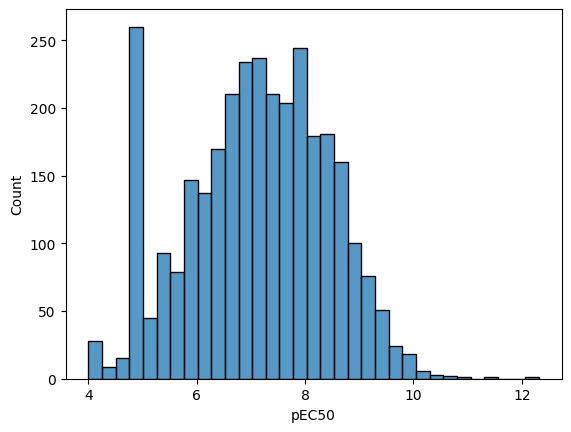

In [50]:
# histogram of pEC50 values
sns.histplot(data=df,x='pEC50')
plt.show()

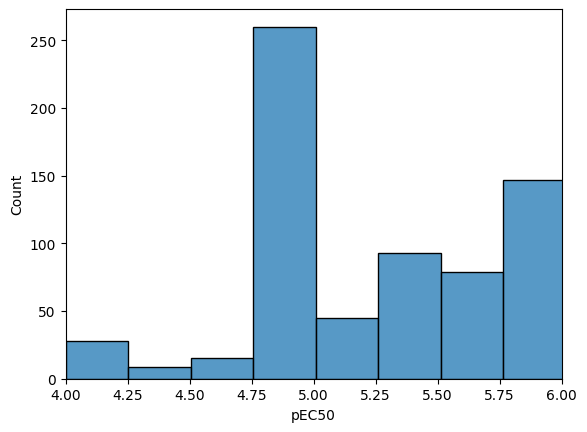

In [51]:
sns.histplot(data=df,x='pEC50')
plt.xlim(4,6)
plt.show()

In [52]:
df[(df['pEC50']>=4.50) & (df['pEC50']<=5.25)].T

11        55       68        85      108     109   \
Assay Type              F         F        F         F       F       F   
Target Name            D1        D1       D1        D1      D1      D1   
pEC50            5.066513  5.066665      5.0  4.796695     5.0     5.0   
MW                271.316   271.316  211.334   325.364  295.81  295.81   
LogP               2.4116    2.4116   1.5822     2.785   2.392   2.392   
H_Donors              3.0       3.0      2.0       1.0     1.0     1.0   
H_Acceptors           4.0       4.0      4.0       5.0     3.0     3.0   
TPSA                75.71     75.71    50.94     51.16    32.7    32.7   
Ring_Count            3.0       3.0      2.0       5.0     4.0     4.0   
Rotatable_Bonds       2.0       2.0      3.0       1.0     2.0     2.0   

                    113      115       120      158   ...     2948      3053  \
Assay Type             F        F         F        B  ...        F         B   
Target Name           D1       D1        D1       D1  ...       D4        D4   
pEC50                5.0      5.0  4.522879      5.0  ...      5.0  5.035646   
MW               255.745  298.224  1721.165  351.402  ...  430.552   359.473   
LogP              1.6118   2.7791   3.07117   3.2893  ...  4.35962   3.90892   
H_Donors             1.0      1.0      21.0      0.0  ...      1.0       1.0   
H_Acceptors          3.0      2.0      19.0      5.0  ...      6.0       3.0   
TPSA                32.7    23.47    562.34    55.84  ...    61.19     35.58   
Ring_Count           3.0      3.0       5.0      4.0  ...      4.0       4.0   
Rotatable_Bonds      0.0      0.0      55.0      2.0  ...      8.0       4.0   

                    3072     3073      3087      3088      3090     3091  \
Assay Type             B        B         B         B         B        F   
Target Name           D4       D4        D4        D4        D4       D5   
pEC50               5.18      5.0  5.229148  4.966576  4.772885      5.0   
MW               388.303  339.468   334.445   345.468    658.92  450.406   
LogP               1.956    3.002   2.10442    2.9863    8.6922   4.7462   
H_Donors             4.0      1.0       1.0       0.0       2.0      2.0   
H_Acceptors          3.0      5.0       6.0       6.0       6.0      3.0   
TPSA              121.08    48.05     70.58     47.36     96.36    60.77   
Ring_Count           2.0      4.0       3.0       3.0       3.0      3.0   
Rotatable_Bonds      6.0      4.0       4.0       6.0      11.0      6.0   

                    3123     3124  
Assay Type             B        B  
Target Name           D5       D5  
pEC50               4.95     4.62  
MW               561.465  388.303  
LogP              2.1336    1.956  
H_Donors             6.0      4.0  
H_Acceptors          7.0      3.0  
TPSA              205.91   121.08  
Ring_Count           2.0      2.0  
Rotatable_Bonds      6.0      6.0  

[10 rows x 317 columns]

In [53]:
df[df['pEC50']==5.0]

Assay Type Target Name  pEC50       MW     LogP  H_Donors  H_Acceptors  \
68            F          D1    5.0  211.334  1.58220       2.0          4.0   
108           F          D1    5.0  295.810  2.39200       1.0          3.0   
109           F          D1    5.0  295.810  2.39200       1.0          3.0   
113           F          D1    5.0  255.745  1.61180       1.0          3.0   
115           F          D1    5.0  298.224  2.77910       1.0          2.0   
...         ...         ...    ...      ...      ...       ...          ...   
2872          F          D4    5.0  357.885  4.35520       0.0          4.0   
2917          F          D4    5.0  367.493  3.64810       0.0          5.0   
2948          F          D4    5.0  430.552  4.35962       1.0          6.0   
3073          B          D4    5.0  339.468  3.00200       1.0          5.0   
3091          F          D5    5.0  450.406  4.74620       2.0          3.0   

       TPSA  Ring_Count  Rotatable_Bonds  
68    50.94         2.0              3.0  
108   32.70         4.0              2.0  
109   32.70         4.0              2.0  
113   32.70         3.0              0.0  
115   23.47         3.0              0.0  
...     ...         ...              ...  
2872  37.72         3.0              6.0  
2917  37.30         3.0              8.0  
2948  61.19         4.0              8.0  
3073  48.05         4.0              4.0  
3091  60.77         3.0              6.0  

[240 rows x 10 columns]

In [54]:
print(len(df[df['pEC50']==4.0]))
df[df['pEC50']==4.0]

25


Assay Type Target Name  pEC50       MW     LogP  H_Donors  H_Acceptors  \
83            F          D1    4.0  363.841  3.19230       2.0          5.0   
673           F          D2    4.0  219.284  1.95150       1.0          3.0   
929           F          D2    4.0  573.536  2.24420       3.0         11.0   
930           F          D2    4.0  445.487  1.22080       2.0         10.0   
931           F          D2    4.0  373.375  1.65230       3.0          4.0   
932           F          D2    4.0  245.326  0.62890       2.0          3.0   
933           F          D2    4.0  359.470  2.66650       1.0          4.0   
934           F          D2    4.0  345.443  2.27640       1.0          4.0   
935           F          D2    4.0  459.514  1.97510       3.0         10.0   
936           F          D2    4.0  259.353  1.14680       2.0          3.0   
937           F          D2    4.0  359.470  2.71280       2.0          4.0   
941           F          D2    4.0  418.461  2.31520       2.0          9.0   
943           F          D2    4.0  535.956  2.48340       2.0         14.0   
944           F          D2    4.0  634.782  5.36530       3.0         12.0   
952           F          D2    4.0  337.343  1.72170       3.0          9.0   
1736          A          D2    4.0  370.449  2.54060       0.0          5.0   
1742          A          D2    4.0  379.460  3.01330       1.0          4.0   
1759          A          D2    4.0  380.448  2.40830       1.0          5.0   
1760          A          D2    4.0  406.504  2.08910       0.0          6.0   
1792          A          D2    4.0  433.430  3.90330       1.0          4.0   
2057          B          D2    4.0  414.477  3.95740       3.0          4.0   
2058          B          D2    4.0  325.368  1.14840       2.0          4.0   
2059          B          D2    4.0  511.626  5.60034       1.0          8.0   
2507          B          D3    4.0  309.413  3.20812       1.0          3.0   
2605          B          D3    4.0  393.487  3.40340       1.0          4.0   

        TPSA  Ring_Count  Rotatable_Bonds  
83     62.16         4.0              2.0  
673    32.70         2.0              3.0  
929   168.01         6.0              5.0  
930   130.71         6.0              5.0  
931    81.67         3.0              3.0  
932    44.37         3.0              3.0  
933    61.88         3.0              3.0  
934    61.88         3.0              3.0  
935   139.50         6.0              6.0  
936    58.36         3.0              3.0  
937    70.67         3.0              4.0  
941   127.47         5.0              7.0  
943   167.53         6.0              8.0  
944   171.79         4.0             22.0  
952   127.39         4.0              5.0  
1736   51.24         3.0              7.0  
1742   57.80         4.0              6.0  
1759   70.69         4.0              6.0  
1760   68.31         3.0              8.0  
1792   57.80         4.0              6.0  
2057   87.66         3.0              6.0  
2058   80.20         3.0              5.0  
2059   87.23         6.0              8.0  
2507   45.23         3.0              4.0  
2605   57.80         4.0              7.0

In [55]:
df_updated = df[(df['pEC50']!=5.0) & (df['pEC50']!=4.0)]
df_updated = df_updated.reset_index().drop('index',axis=1)
df_updated


Assay Type Target Name     pEC50       MW     LogP  H_Donors  \
0             F          D1  6.625252  315.369  2.29020       3.0   
1             F          D1  6.847712  223.272  1.44890       3.0   
2             F          D1  7.866461  279.380  3.00930       3.0   
3             F          D1  7.903090  315.413  2.88330       3.0   
4             F          D1  7.463442  285.343  2.28160       3.0   
...         ...         ...       ...      ...      ...       ...   
2855          B          D5  7.540608  385.467  4.28530       0.0   
2856          B          D5  5.400000  326.470  1.77042       4.0   
2857          B          D5  4.460000  541.475  2.12360       6.0   
2858          B          D5  4.950000  561.465  2.13360       6.0   
2859          B          D5  4.620000  388.303  1.95600       4.0   

      H_Acceptors    TPSA  Ring_Count  Rotatable_Bonds  
0             5.0   84.94         3.0              4.0  
1             4.0   75.71         2.0              2.0  
2             4.0   75.71         2.0              6.0  
3             4.0   61.72         3.0              4.0  
4             4.0   75.71         3.0              3.0  
...           ...     ...         ...              ...  
2855          5.0   56.89         5.0              2.0  
2856          4.0  118.42         1.0              8.0  
2857          7.0  205.91         1.0              8.0  
2858          7.0  205.91         2.0              6.0  
2859          3.0  121.08         2.0              6.0  

[2860 rows x 10 columns]

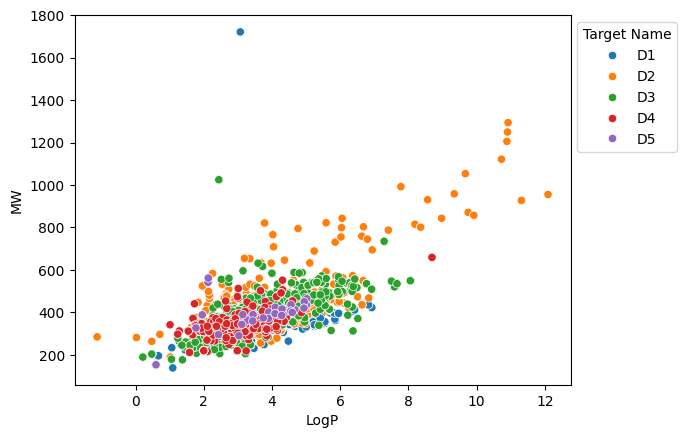

In [56]:
ax = sns.scatterplot(data=df_updated,x='LogP',y='MW',hue='Target Name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

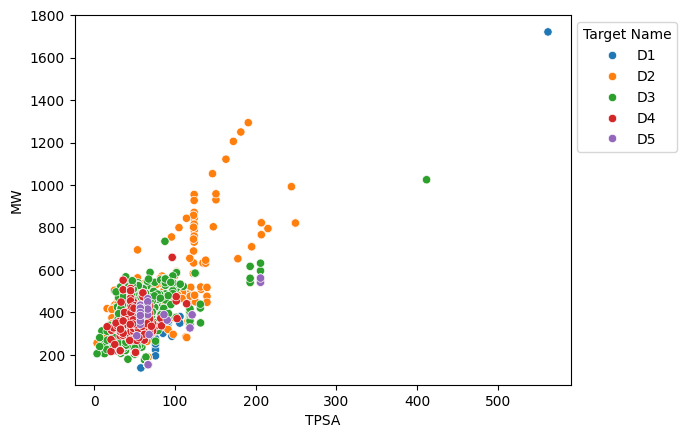

In [57]:
ax = sns.scatterplot(data=df_updated,x='TPSA',y='MW',hue='Target Name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [58]:
df_updated['Ring_Count'].unique()

array([ 3.,  2.,  4.,  6.,  1.,  5.,  8.,  7., 10., 12.])

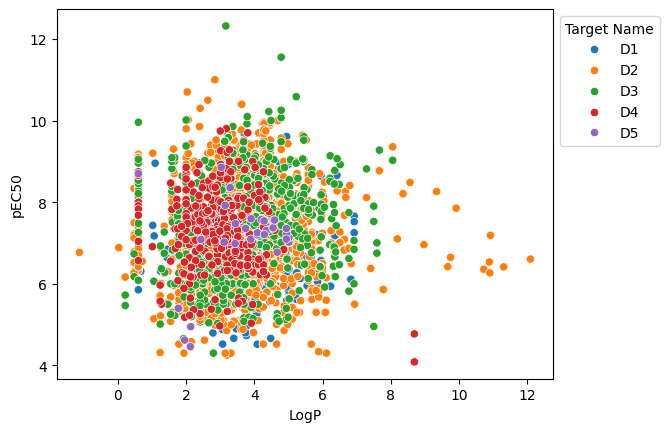

In [59]:
ax = sns.scatterplot(data=df_updated,x='LogP',y='pEC50',hue='Target Name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

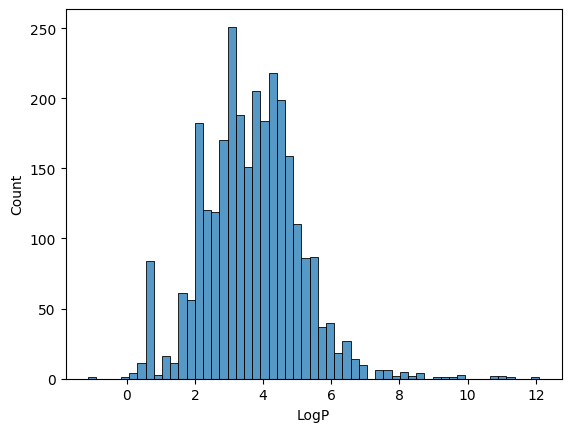

In [60]:
sns.histplot(data=df_updated,x='LogP')
plt.show()

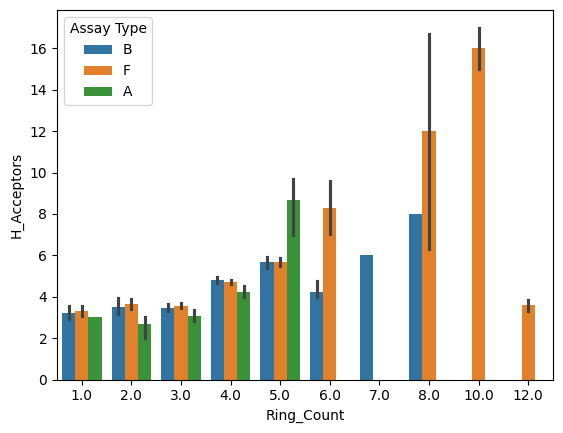

In [61]:
sns.barplot(data=df_updated,x='Ring_Count',y='H_Acceptors',hue='Assay Type')
plt.show()

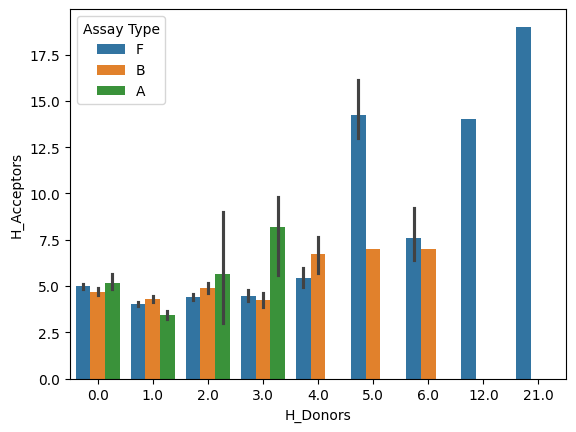

In [62]:
sns.barplot(data=df_updated,x='H_Donors',y='H_Acceptors',hue='Assay Type')
plt.show()

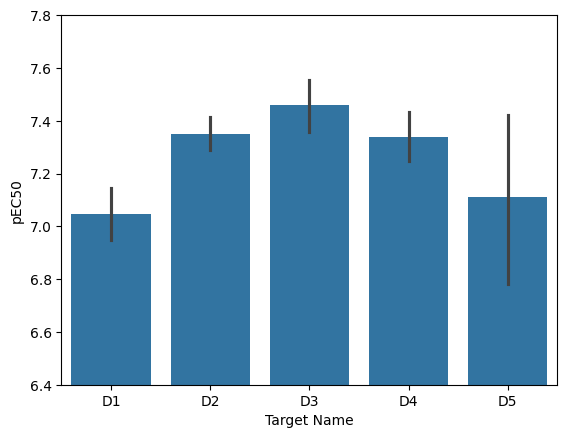

In [63]:
ax = sns.barplot(data=df_updated,x='Target Name',y='pEC50')
plt.ylim(6.4,7.8)
plt.show()

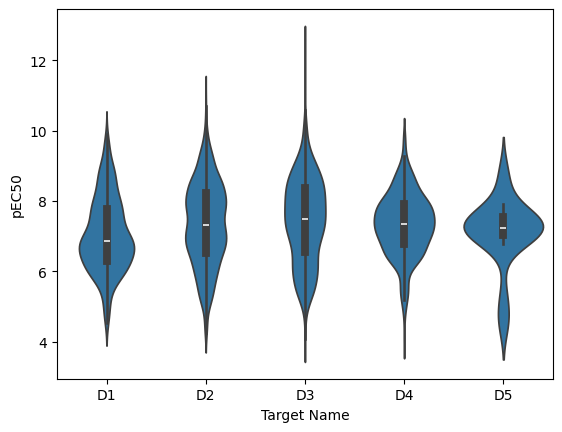

In [64]:
ax = sns.violinplot(data=df_updated,x='Target Name',y='pEC50')
#plt.ylim(6.4,7.8)
plt.show()

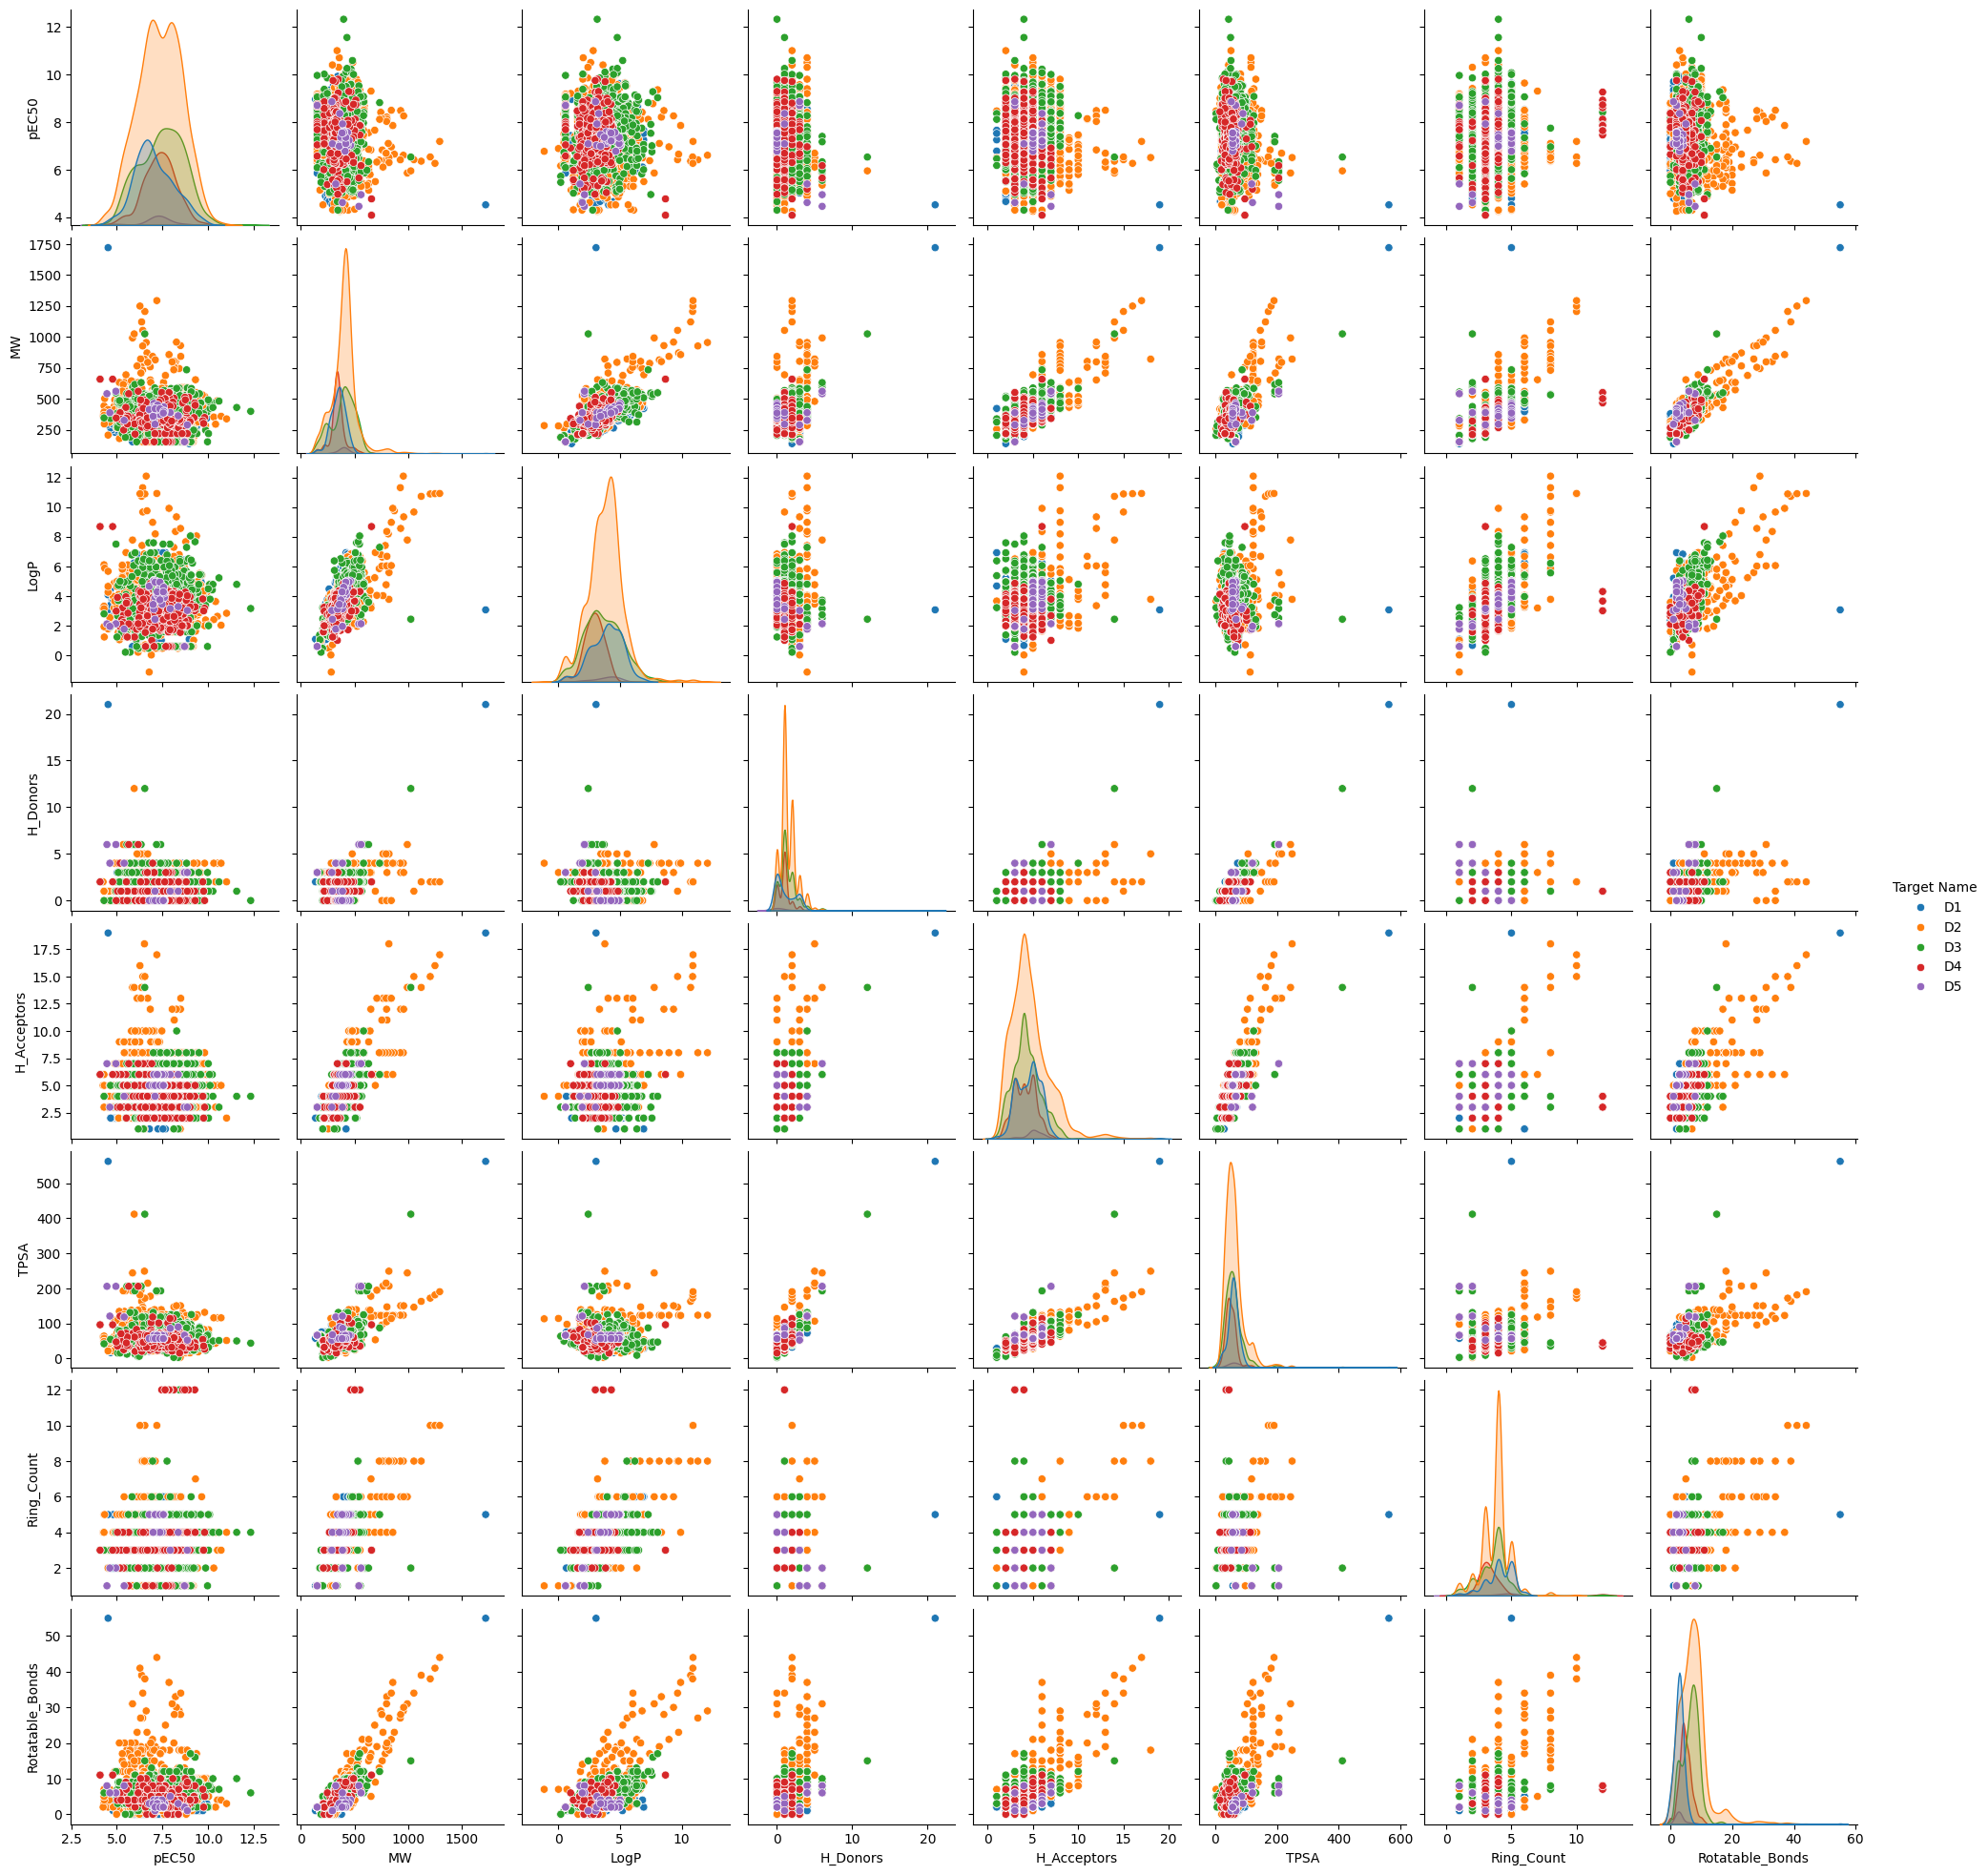

In [65]:
sns.pairplot(data=df_updated,hue='Target Name')
plt.show()

In [66]:
df_updated.head()

Assay Type Target Name     pEC50       MW    LogP  H_Donors  H_Acceptors  \
0          F          D1  6.625252  315.369  2.2902       3.0          5.0   
1          F          D1  6.847712  223.272  1.4489       3.0          4.0   
2          F          D1  7.866461  279.380  3.0093       3.0          4.0   
3          F          D1  7.903090  315.413  2.8833       3.0          4.0   
4          F          D1  7.463442  285.343  2.2816       3.0          4.0   

    TPSA  Ring_Count  Rotatable_Bonds  
0  84.94         3.0              4.0  
1  75.71         2.0              2.0  
2  75.71         2.0              6.0  
3  61.72         3.0              4.0  
4  75.71         3.0              3.0

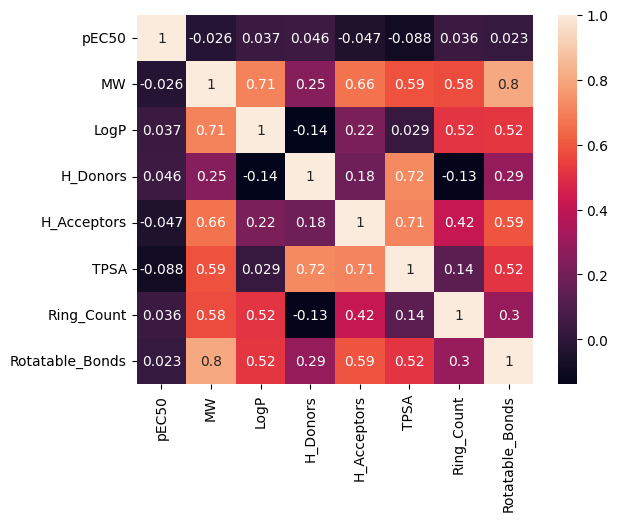

In [67]:
# get dummies for the correlation plot
sns.heatmap(data=df_updated.corr(numeric_only=True), annot=True)
plt.show()

In [68]:
df_dummies = pd.get_dummies(df_updated, dtype=float)
df_dummies

pEC50       MW     LogP  H_Donors  H_Acceptors    TPSA  Ring_Count  \
0     6.625252  315.369  2.29020       3.0          5.0   84.94         3.0   
1     6.847712  223.272  1.44890       3.0          4.0   75.71         2.0   
2     7.866461  279.380  3.00930       3.0          4.0   75.71         2.0   
3     7.903090  315.413  2.88330       3.0          4.0   61.72         3.0   
4     7.463442  285.343  2.28160       3.0          4.0   75.71         3.0   
...        ...      ...      ...       ...          ...     ...         ...   
2855  7.540608  385.467  4.28530       0.0          5.0   56.89         5.0   
2856  5.400000  326.470  1.77042       4.0          4.0  118.42         1.0   
2857  4.460000  541.475  2.12360       6.0          7.0  205.91         1.0   
2858  4.950000  561.465  2.13360       6.0          7.0  205.91         2.0   
2859  4.620000  388.303  1.95600       4.0          3.0  121.08         2.0   

      Rotatable_Bonds  Assay Type_A  Assay Type_B  Assay Type_F  \
0                 4.0           0.0           0.0           1.0   
1                 2.0           0.0           0.0           1.0   
2                 6.0           0.0           0.0           1.0   
3                 4.0           0.0           0.0           1.0   
4                 3.0           0.0           0.0           1.0   
...               ...           ...           ...           ...   
2855              2.0           0.0           1.0           0.0   
2856              8.0           0.0           1.0           0.0   
2857              8.0           0.0           1.0           0.0   
2858              6.0           0.0           1.0           0.0   
2859              6.0           0.0           1.0           0.0   

      Target Name_D1  Target Name_D2  Target Name_D3  Target Name_D4  \
0                1.0             0.0             0.0             0.0   
1                1.0             0.0             0.0             0.0   
2                1.0             0.0             0.0             0.0   
3                1.0             0.0             0.0             0.0   
4                1.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
2855             0.0             0.0             0.0             0.0   
2856             0.0             0.0             0.0             0.0   
2857             0.0             0.0             0.0             0.0   
2858             0.0             0.0             0.0             0.0   
2859             0.0             0.0             0.0             0.0   

      Target Name_D5  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
2855             1.0  
2856             1.0  
2857             1.0  
2858             1.0  
2859             1.0  

[2860 rows x 16 columns]

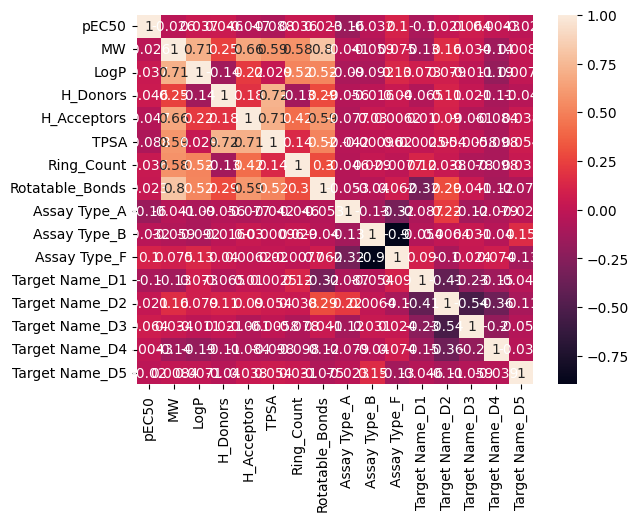

In [69]:
sns.heatmap(data=df_dummies.corr(numeric_only=True), annot=True)
plt.show()

In [70]:
# necessary imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [71]:
# our preprocessed and cleaned data
df = pd.read_csv('dopamine_pEC50.csv')

# Renaming Target Name column values to shorter names.
df['Target Name'] = df['Target Name'].replace({'Dopamine D1 receptor':'D1','Dopamine D2 receptor':'D2',
                                              'Dopamine D3 receptor':'D3','Dopamine D4 receptor':'D4', 'Dopamine D5 receptor':'D5'})

# i also removed rows with pEC50 = 4.0 and 5.0 exactly
df = df[(df['pEC50']!=5.0) & (df['pEC50']!=4.0)]
df = df.reset_index().drop('index',axis=1)

df.head()


Assay Type Target Name     pEC50       MW    LogP  H_Donors  H_Acceptors  \
0          F          D1  6.625252  315.369  2.2902       3.0          5.0   
1          F          D1  6.847712  223.272  1.4489       3.0          4.0   
2          F          D1  7.866461  279.380  3.0093       3.0          4.0   
3          F          D1  7.903090  315.413  2.8833       3.0          4.0   
4          F          D1  7.463442  285.343  2.2816       3.0          4.0   

    TPSA  Ring_Count  Rotatable_Bonds  
0  84.94         3.0              4.0  
1  75.71         2.0              2.0  
2  75.71         2.0              6.0  
3  61.72         3.0              4.0  
4  75.71         3.0              3.0

In [72]:
# X and y split

X = df.drop('pEC50',axis=1)
y = df['pEC50']

X.shape, y.shape

((2860, 9), (2860,))

In [73]:
# train, test, val splits
from sklearn.model_selection import train_test_split

# performing the train, validation and hold-out dataset split now (80/10/10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_hold, y_val, y_hold = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [74]:
X_train.shape, X_val.shape, X_hold.shape, y_train.shape, y_val.shape, y_hold.shape


((2288, 9), (286, 9), (286, 9), (2288,), (286,), (286,))

In [75]:
# creating X_practise set for its later use in cross-validation

X_combine = [X_train, X_val]

X_prac = pd.concat(X_combine)

# creating y_practise set for its later use in cross-validation

y_combine = [y_train, y_val]

y_prac = pd.concat(y_combine)

In [76]:
# cat feats = ['Assay Type', 'Target Name']
# num feats = ['pEC50', 'MW', 'LogP', 'H_Donors','H_Acceptors', 'TPSA', 'Ring_Count', 'Rotatable_Bonds']

# setting up the preprocessor
# we don't have any missing values. It has been ensured already.
# we need to one hot encode the categorical columns and scale the numerical features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(101)

cat_feat = ['Assay Type', 'Target Name']
cat_transformer = OneHotEncoder().set_output(transform="default")

num_feat = ['MW', 'LogP', 'H_Donors','H_Acceptors', 'TPSA', 'Ring_Count', 'Rotatable_Bonds']
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[ ("cat",cat_transformer,cat_feat),
                                               ("num",num_transformer,num_feat)])

In [77]:
transformed_df = preprocessor.fit_transform(X_train)
df_new = pd.DataFrame(transformed_df,columns=preprocessor.get_feature_names_out())
df_new

cat__Assay Type_A  cat__Assay Type_B  cat__Assay Type_F  \
0                   0.0                1.0                0.0   
1                   0.0                1.0                0.0   
2                   0.0                0.0                1.0   
3                   1.0                0.0                0.0   
4                   1.0                0.0                0.0   
...                 ...                ...                ...   
2283                0.0                0.0                1.0   
2284                0.0                0.0                1.0   
2285                0.0                1.0                0.0   
2286                1.0                0.0                0.0   
2287                0.0                0.0                1.0   

      cat__Target Name_D1  cat__Target Name_D2  cat__Target Name_D3  \
0                     0.0                  0.0                  0.0   
1                     0.0                  1.0                  0.0   
2                     0.0                  0.0                  1.0   
3                     0.0                  1.0                  0.0   
4                     0.0                  1.0                  0.0   
...                   ...                  ...                  ...   
2283                  0.0                  1.0                  0.0   
2284                  0.0                  1.0                  0.0   
2285                  0.0                  1.0                  0.0   
2286                  0.0                  1.0                  0.0   
2287                  0.0                  1.0                  0.0   

      cat__Target Name_D4  cat__Target Name_D5   num__MW  num__LogP  \
0                     1.0                  0.0 -0.565049  -0.556008   
1                     0.0                  0.0  0.062169   0.557937   
2                     0.0                  0.0  1.329974   1.266258   
3                     0.0                  0.0 -0.198864   0.168725   
4                     0.0                  0.0 -0.194313  -0.687287   
...                   ...                  ...       ...        ...   
2283                  0.0                  0.0  0.546020   0.410868   
2284                  0.0                  0.0 -1.156001  -0.007347   
2285                  0.0                  0.0 -0.309378  -0.276160   
2286                  0.0                  0.0 -0.017690  -0.530966   
2287                  0.0                  0.0  1.769411   0.852499   

      num__H_Donors  num__H_Acceptors  num__TPSA  num__Ring_Count  \
0         -0.257735         -0.264814  -0.478377         0.212699   
1         -0.257735          0.282022  -0.292961         0.212699   
2         -0.257735         -0.264814  -0.464496         0.212699   
3         -0.257735         -1.358484  -0.769557        -0.610744   
4         -0.257735         -0.264814   0.085804         0.212699   
...             ...               ...        ...              ...   
2283      -0.257735         -0.264814  -0.464496         0.212699   
2284      -1.109901         -1.905320  -1.838429        -1.434187   
2285      -1.109901          0.282022  -0.099943         0.212699   
2286      -1.109901          0.282022  -0.251978        -0.610744   
2287       1.446596          1.375692   1.416440         1.036142   

      num__Rotatable_Bonds  
0                -0.519482  
1                 0.664121  
2                -0.046040  
3                -0.519482  
4                -0.282761  
...                    ...  
2283              0.190680  
2284              0.190680  
2285             -0.992923  
2286              0.190680  
2287              0.190680  

[2288 rows x 15 columns]

In [78]:
# importing our models

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [79]:
# a function to fit, train the model and return the training and validation scores (to check the possibility of over/under-fitting)

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def fit_and_score(name, model,X_train, X_val,y_train,y_val):
    # need to set random seed
    np.random.seed(101)

    # fitting and getting y_preds
    model.fit(X_train,y_train)
    y_train_preds = model.predict(X_train)
    y_val_preds = model.predict(X_val)

    # calculating training and validation set scores
    mae_t = mean_absolute_error(y_train,y_train_preds)
    rmse_t = np.sqrt(mean_squared_error(y_train,y_train_preds))
    r2_t = r2_score(y_train,y_train_preds)

    mae_v = mean_absolute_error(y_val,y_val_preds)
    rmse_v = np.sqrt(mean_squared_error(y_val,y_val_preds))
    r2_v = r2_score(y_val,y_val_preds)

    dict = {}
    dict[name] = [mae_t,rmse_t,r2_t,mae_v,rmse_v,r2_v]

    df = pd.DataFrame(data=dict.values(), index=dict.keys(),columns=["Train MAE","Train RMSE","Train R-squared",
                                                                    "Validation MAE","Validation RMSE","Validation R-squared"])

    df.index.name = 'Models'

    return df

In [80]:
np.random.seed(101)
model = RandomForestRegressor()
pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])

pipe.fit(X_train,y_train)
pipe.score(X_val,y_val)

0.4871801512461099

In [81]:
pipe.score(X_val,y_val)
# with pipeline including a preprocessor

np.random.seed(101)

regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RF": RandomForestRegressor()}

df_model = []

for name, model in regression_models.items():

    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    df_model.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))

base_models = pd.concat(df_model)
base_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                               
Ridge        0.852675    1.068672         0.113828        0.959668   
SVR_linear   0.846812    1.075082         0.103166        0.946154   
SVR_rbf      0.678855    0.901341         0.369613        0.787894   
RF           0.354141    0.503582         0.803225        0.651724   

            Validation RMSE  Validation R-squared  
Models                                             
Ridge              1.195282              0.078305  
SVR_linear         1.198467              0.073386  
SVR_rbf            1.044862              0.295689  
RF                 0.891578              0.487180

In [82]:
# a function to plot these scores

# plotting these scores for better visualisation through a function

def plot_train_val_scores(df):

    # A df of MAE score
    df_MAE = df[['Train MAE','Validation MAE']].sort_values("Validation MAE",ascending=True)
    dfm3_MAE = pd.melt(df_MAE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # A df of RMSE score
    df_RMSE = df[['Train RMSE','Validation RMSE']].sort_values("Validation RMSE",ascending=True)
    dfm3_RMSE = pd.melt(df_RMSE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # Now dataframe for the R^2 value
    df_R2 = df[['Train R-squared','Validation R-squared']].sort_values("Validation R-squared",ascending=True)
    dfm3_R2 = pd.melt(df_R2.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    #set seaborn plotting aesthetics as default
    sns.set()

    #define plotting region (1 row, 3 columns)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),dpi=300)

    #create boxplot in each subplot for all scoring metrics together

    # MAE - dfm3_MAE
    sns.barplot(data=dfm3_MAE,x="Models",y="Score value",hue="Score type", ax=axes[0]);
    sns.move_legend(
    axes[0], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # RMSE - dfm3_RMSE
    sns.barplot(data=dfm3_RMSE,x="Models",y="Score value",hue="Score type", ax=axes[1]);
    sns.move_legend(
    axes[1], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # R^2 - dfm3_R2
    sns.barplot(data=dfm3_R2,x="Models",y="Score value",hue="Score type", ax=axes[2]);
    sns.move_legend(
    axes[2], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    axes[0].tick_params(labelrotation=90)
    axes[1].tick_params(labelrotation=90)
    axes[2].tick_params(labelrotation=90)

    plt.tight_layout()
    return plt.show()

In [83]:
# a function to plot cross-validated scores

# plotting these scores for better visualisation through a function

def plot_cross_val_scores(df):

    # A df of MAE score
    df_MAE = df[['MAE']].sort_values("MAE",ascending=True)
    dfm3_MAE = pd.melt(df_MAE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # A df of RMSE score
    df_RMSE = df[['RMSE']].sort_values("RMSE",ascending=True)
    dfm3_RMSE = pd.melt(df_RMSE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # Now dataframe for the R^2 value
    df_R2 = df[['R^2']].sort_values("R^2",ascending=True)
    dfm3_R2 = pd.melt(df_R2.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    #set seaborn plotting aesthetics as default
    sns.set()

    #define plotting region (1 row, 3 columns)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),dpi=300)

    #create boxplot in each subplot for all scoring metrics together

    # MAE - dfm3_MAE
    sns.barplot(data=dfm3_MAE,x="Models",y="Score value",hue="Score type", ax=axes[0]);
    sns.move_legend(
    axes[0], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # RMSE - dfm3_RMSE
    sns.barplot(data=dfm3_RMSE,x="Models",y="Score value",hue="Score type", ax=axes[1]);
    sns.move_legend(
    axes[1], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # R^2 - dfm3_R2
    sns.barplot(data=dfm3_R2,x="Models",y="Score value",hue="Score type", ax=axes[2]);
    sns.move_legend(
    axes[2], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    axes[0].tick_params(labelrotation=90)
    axes[1].tick_params(labelrotation=90)
    axes[2].tick_params(labelrotation=90)

    plt.tight_layout()
    return plt.show()

In [84]:
# a function to perform randomized search CV on the dataset and returns the best parameters
# our focus is on minimizing the MAE, so it will be chosen as the scoring metric

from sklearn.model_selection import RandomizedSearchCV

def RS_on_model(model, param_grid, X, y):
    np.random.seed(101)

    RS = RandomizedSearchCV(model, param_grid, cv=5, n_iter=50, verbose=True, scoring='neg_mean_absolute_error')
    RS.fit(X,y)
    best_params = RS.best_params_

    return best_params

In [85]:
np.random.seed(101)

# randomized search for SVR(rbf) model

models = [("SVR_rbf", SVR(kernel='rbf')), ("Random Forest", RandomForestRegressor())]

# param grid also has default values of parameters

param_grids_RS = [{"model__C": np.logspace(-4,4,25), "model__gamma" : ["scale","auto"]},
                 {"model__n_estimators":np.arange(50,1001,50),
                 "model__max_depth":[None,1,3,5,10],
                 "model__min_samples_split":np.arange(2,20,2),
                 "model__min_samples_leaf":np.arange(1,20,2)}]

#dictionary for models

results = []

# a loop for all models and scores.

for (name, model), param_grid in zip(models, param_grids_RS):
    #np.random.seed(101)

    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    best_result = RS_on_model(pipe, param_grid, X_prac, y_prac)

    results.append({'Model': name, 'Best parameters': best_result})

RS_results_df = pd.DataFrame(results)
RS_results_df
print(RS_results_df['Best parameters'][0])
print(RS_results_df['Best parameters'][1])

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'model__gamma': 'scale', 'model__C': np.float64(21.54434690031882)}
{'model__n_estimators': np.int64(500), 'model__min_samples_split': np.int64(6), 'model__min_samples_leaf': np.int64(1), 'model__max_depth': None}


In [86]:
# a function to determine the cross-validated scores from the X_practise and y_practise sets

from sklearn.model_selection import cross_val_score

def model_cross_val_scores(model,name, X, y):
    np.random.seed(101)

    # on validation test set

    mean_cv_mae = np.mean(cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error"))
    mean_cv_rmse = np.mean(cross_val_score(model,X,y,cv=5,scoring="neg_root_mean_squared_error"))
    mean_cv_r2 = np.mean(cross_val_score(model,X,y,cv=5,scoring="r2"))

    metrics_dict = {}
    metrics_dict[name] = [(-1)*mean_cv_mae,(-1)*mean_cv_rmse,mean_cv_r2]
    cv_metrics = pd.DataFrame(data=metrics_dict.values(),index=metrics_dict.keys(),columns=["MAE", "RMSE", "R^2"])

    return cv_metrics

In [87]:
np.random.seed(101)

tuned_models = [("SVR_rbf", SVR(kernel='rbf')), ("RF", RandomForestRegressor()),
            ("Tuned SVR_rbf", SVR(kernel='rbf', gamma='scale', C=21.54434690031882)),
            ("Tuned RF", RandomForestRegressor(n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_depth=None))]

#dictionary for models

results_tuned = []

# a loop for all models and getting their cross-validated scores.

for name, model in tuned_models:
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])

    results_tuned.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

tuned_models_df = pd.concat(results_tuned)
tuned_models_df

MAE      RMSE       R^2
SVR_rbf        0.752343  0.980259  0.268875
RF             0.642956  0.866816  0.425200
Tuned SVR_rbf  0.707672  0.949335  0.313851
Tuned RF       0.653157  0.875380  0.416376

In [90]:
# ell, the random forest models are performing better compared to the SVRs.
# getting the scores of training and validation sets for the normal RF and tuned RF model for comparison.
# I need to check if the model still overfits or not.

rf_models = { "RF": RandomForestRegressor(),
             "Tuned RF": RandomForestRegressor(n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_depth=None)}

RF_models_Scores = []

for name, model in rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    RF_models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_RF_models = pd.concat(RF_models_Scores)
df_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                             
RF         0.354141    0.503582         0.803225        0.651724   
Tuned RF   0.406394    0.556412         0.759773        0.674649   

          Validation RMSE  Validation R-squared  
Models                                           
RF               0.891578              0.487180  
Tuned RF         0.913517              0.461632

In [91]:
# a function to perform gridsearch CV on the dataset and returns the best parameters
# keeping the scoring metric as MAE

from sklearn.model_selection import GridSearchCV

def GS_on_model(model, param_grid, X, y):
    np.random.seed(101)

    GS = GridSearchCV(model, param_grid, cv=5, verbose=True, scoring='neg_mean_absolute_error')
    GS.fit(X,y)
    best_params = GS.best_params_

    return best_params

In [92]:
# performing gridsearchCV only on the Random Forest model
# including the default hyperparamter set as well, in case the randomizedsearchCV didn't perform on it (n_estimators=100, min_sample_split=2)

np.random.seed(101)

# grid search for the randomforest model

RF_model = RandomForestRegressor()


param_grid_RF = {"model__n_estimators":np.append(100, np.arange(450,560,10)),
                 "model__min_samples_split":np.append(2, np.arange(4,9,1))}

pipe_RF = Pipeline(steps=[("preprocessor",preprocessor), ("model",RF_model)])
best_result_RF = GS_on_model(pipe_RF, param_grid_RF, X_prac, y_prac)

# reporting the best parameters (we will make the dataframe of it later, if need be)
best_result_RF

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'model__min_samples_split': np.int64(2), 'model__n_estimators': np.int64(490)}

In [93]:
# performing gridsearchCV only on the Random Forest model
# including the default hyperparamter set as well, in case the randomizedsearchCV didn't perform on it (n_estimators=100, min_sample_split=2)

from sklearn.pipeline import Pipeline

np.random.seed(101)

# grid search for the randomforest model

RF_model = RandomForestRegressor()


param_grid_RF = {"model__n_estimators":np.append(100, np.arange(450,560,10)),
                 "model__min_samples_split":np.append(2, np.arange(4,9,1))}

pipe_RF = Pipeline(steps=[("preprocessor",preprocessor), ("model",RF_model)])
best_result_RF = GS_on_model(pipe_RF, param_grid_RF, X_prac, y_prac)

# reporting the best parameters (we will make the dataframe of it later, if need be)
best_result_RF

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'model__min_samples_split': np.int64(2), 'model__n_estimators': np.int64(490)}

In [94]:
# getting the scores of training and validation sets for the grid-search tuned RF model for comparison with our previous models.

rf_models = { "RF": RandomForestRegressor(),
             "RS-Tuned RF": RandomForestRegressor(n_estimators=500, min_samples_split=6),
             "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2)}

RF_models_Scores = []

for name, model in rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    RF_models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_RF_models = pd.concat(RF_models_Scores)
df_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                
RF            0.354141    0.503582         0.803225        0.651724   
RS-Tuned RF   0.406394    0.556412         0.759773        0.674649   
GS-Tuned RF   0.352715    0.502086         0.804393        0.650247   

             Validation RMSE  Validation R-squared  
Models                                              
RF                  0.891578              0.487180  
RS-Tuned RF         0.913517              0.461632  
GS-Tuned RF         0.892469              0.486154

In [95]:
# importing the models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [96]:
ensemble_models = {'ab':AdaBoostRegressor(),
                  'gb': GradientBoostingRegressor(),
                  'xgb': XGBRegressor(),
                  "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2)  } # including GS-tuned RF for comparison

ensemble_model_results = []

# a loop for all models and scores.

for name, model in ensemble_models.items():
    np.random.seed(101)
    #print(name)

    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    ensemble_model_results.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))

ensemble_model_results_df = pd.concat(ensemble_model_results)
ensemble_model_results_df

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                
ab            0.874147    1.070089         0.111477        0.980081   
gb            0.703455    0.889148         0.386553        0.822130   
xgb           0.330147    0.488158         0.815094        0.616226   
GS-Tuned RF   0.352715    0.502086         0.804393        0.650247   

             Validation RMSE  Validation R-squared  
Models                                              
ab                  1.196303              0.076729  
gb                  1.039095              0.303442  
xgb                 0.866493              0.515631  
GS-Tuned RF         0.892469              0.486154

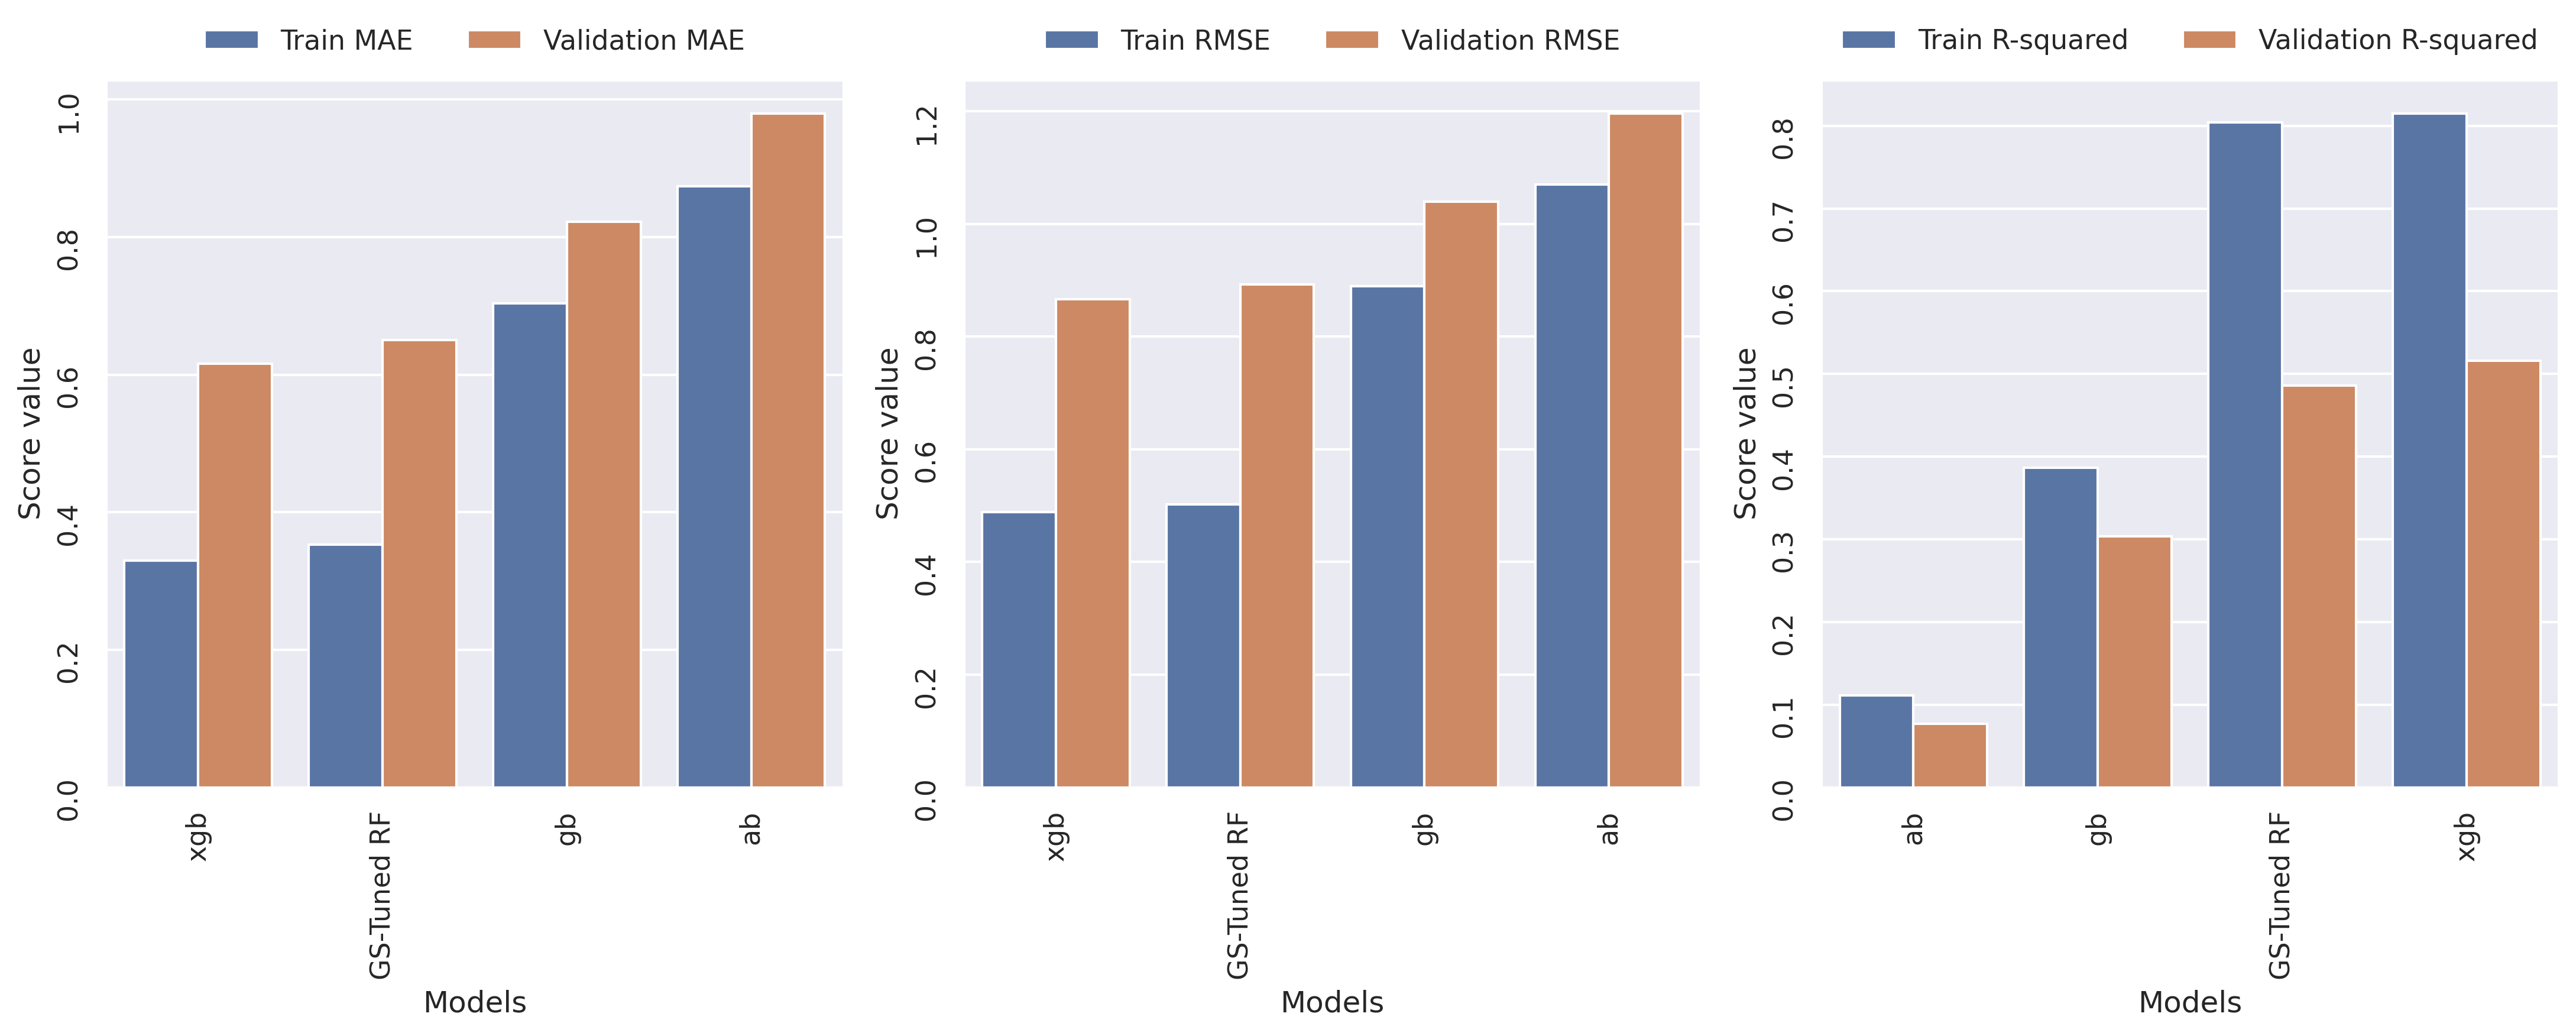

In [97]:
# visualising the results along with previous ones by including the tuned RF model

plot_train_val_scores(ensemble_model_results_df)

In [98]:
# randomized search for XGB and GB models

np.random.seed(101)

models = [("GB", GradientBoostingRegressor()), ("XGB", XGBRegressor())]

# param grid also has default values of parameters

param_grid_gb = [{ 'model__max_depth':range(1,11,1),
                    'model__min_samples_split':range(2,11,2),
                    'model__learning_rate': np.linspace(0.01,0.5,50),
                    'model__max_features': ['sqrt','log2']},
                 { 'model__max_depth':range(1,11,1),
                    'model__min_child_weight':range(0,100,10),
                    'model__learning_rate': np.linspace(0.01,0.5,50)}]

#dictionary for models

results = []

# a loop for all models and scores.

for (name, model), param_grid in zip(models, param_grid_gb):
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    best_result = RS_on_model(pipe, param_grid, X_prac, y_prac)

    results.append({'Model': name, 'Best parameters': best_result})

gb_results_df = pd.DataFrame(results)
gb_results_df

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


Model                                    Best parameters
0    GB  {'model__min_samples_split': 2, 'model__max_fe...
1   XGB  {'model__min_child_weight': 0, 'model__max_dep...

In [99]:
print(gb_results_df['Best parameters'][0])
print(gb_results_df['Best parameters'][1])

{'model__min_samples_split': 2, 'model__max_features': 'sqrt', 'model__max_depth': 9, 'model__learning_rate': np.float64(0.16)}
{'model__min_child_weight': 0, 'model__max_depth': 9, 'model__learning_rate': np.float64(0.16)}


In [100]:
# getting the scores of training and validation sets for the tuned models for comparison with our previous RF model.
np.random.seed(101)
xgb_rf_models = { "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
                 "GB": GradientBoostingRegressor(),
                 "Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
                 "XGB": XGBRegressor(),
                 "Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16)}

models_Scores = []

for name, model in xgb_rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_XGB_RF_models = pd.concat(models_Scores)
df_XGB_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                
GS-Tuned RF   0.352715    0.502086         0.804393        0.650247   
GB            0.703455    0.889148         0.386553        0.822130   
Tuned GB      0.285095    0.458899         0.836596        0.597481   
XGB           0.330147    0.488158         0.815094        0.616226   
Tuned XGB     0.278542    0.455180         0.839234        0.610900   

             Validation RMSE  Validation R-squared  
Models                                              
GS-Tuned RF         0.892469              0.486154  
GB                  1.039095              0.303442  
Tuned GB            0.848168              0.535901  
XGB                 0.866493              0.515631  
Tuned XGB           0.887220              0.492181

In [101]:
# randomized search for XGB and GB models

np.random.seed(101)

models = [("GB", GradientBoostingRegressor()), ("XGB", XGBRegressor())]

# param grid also has default values of parameters

param_grid_gb = [{ 'model__max_depth':np.append(3, np.arange(7,12,1)),
                    'model__min_samples_split':np.append(2, np.arange(4,9,1)),
                    'model__learning_rate': np.append(0.10, np.arange(0.13,0.18,0.01)),
                    'model__max_features': ['sqrt','log2']},
                 { 'model__max_depth':np.append(6, np.arange(7,12,1)),
                    'model__min_child_weight':[0,1,2],
                    'model__learning_rate': np.append(0.3, np.linspace(0.14,0.18,21))}]

#dictionary for models

results = []

# a loop for all models and scores.

for (name, model), param_grid in zip(models, param_grid_gb):
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    best_result = GS_on_model(pipe, param_grid, X_prac, y_prac)

    results.append({'Model': name, 'Best parameters': best_result})

gb_results_df = pd.DataFrame(results)
gb_results_df

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 396 candidates, totalling 1980 fits


Model                                    Best parameters
0    GB  {'model__learning_rate': 0.1, 'model__max_dept...
1   XGB  {'model__learning_rate': 0.14200000000000002, ...

In [102]:
print(gb_results_df['Best parameters'][0])
print(gb_results_df['Best parameters'][1])


{'model__learning_rate': np.float64(0.1), 'model__max_depth': np.int64(11), 'model__max_features': 'log2', 'model__min_samples_split': np.int64(8)}
{'model__learning_rate': np.float64(0.14200000000000002), 'model__max_depth': np.int64(11), 'model__min_child_weight': 2}


In [103]:
# getting the scores of training and validation sets for the grid-search tuned RF model for comparison with our previous models.

np.random.seed(101)
xgb_rf_models = { "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
             "GB": GradientBoostingRegressor(),
             "RS Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
             "GS Tuned GB": GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1),
             "XGB": XGBRegressor(),
             "RS Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16),
             "GS Tuned XGB": XGBRegressor(min_child_weight=2, max_depth=11, learning_rate=0.14200000000000002)}

models_Scores = []

for name, model in xgb_rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_XGB_RF_models = pd.concat(models_Scores)
df_XGB_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                 
GS-Tuned RF    0.352715    0.502086         0.804393        0.650247   
GB             0.703455    0.889148         0.386553        0.822130   
RS Tuned GB    0.285095    0.458899         0.836596        0.597481   
GS Tuned GB    0.277349    0.454422         0.839768        0.608812   
XGB            0.330147    0.488158         0.815094        0.616226   
RS Tuned XGB   0.278542    0.455180         0.839234        0.610900   
GS Tuned XGB   0.269062    0.451168         0.842055        0.609028   

              Validation RMSE  Validation R-squared  
Models                                               
GS-Tuned RF          0.892469              0.486154  
GB                   1.039095              0.303442  
RS Tuned GB          0.848168              0.535901  
GS Tuned GB          0.869975              0.511730  
XGB                  0.866493              0.515631  
RS Tuned XGB         0.887220              0.492181  
GS Tuned XGB         0.887269              0.492125

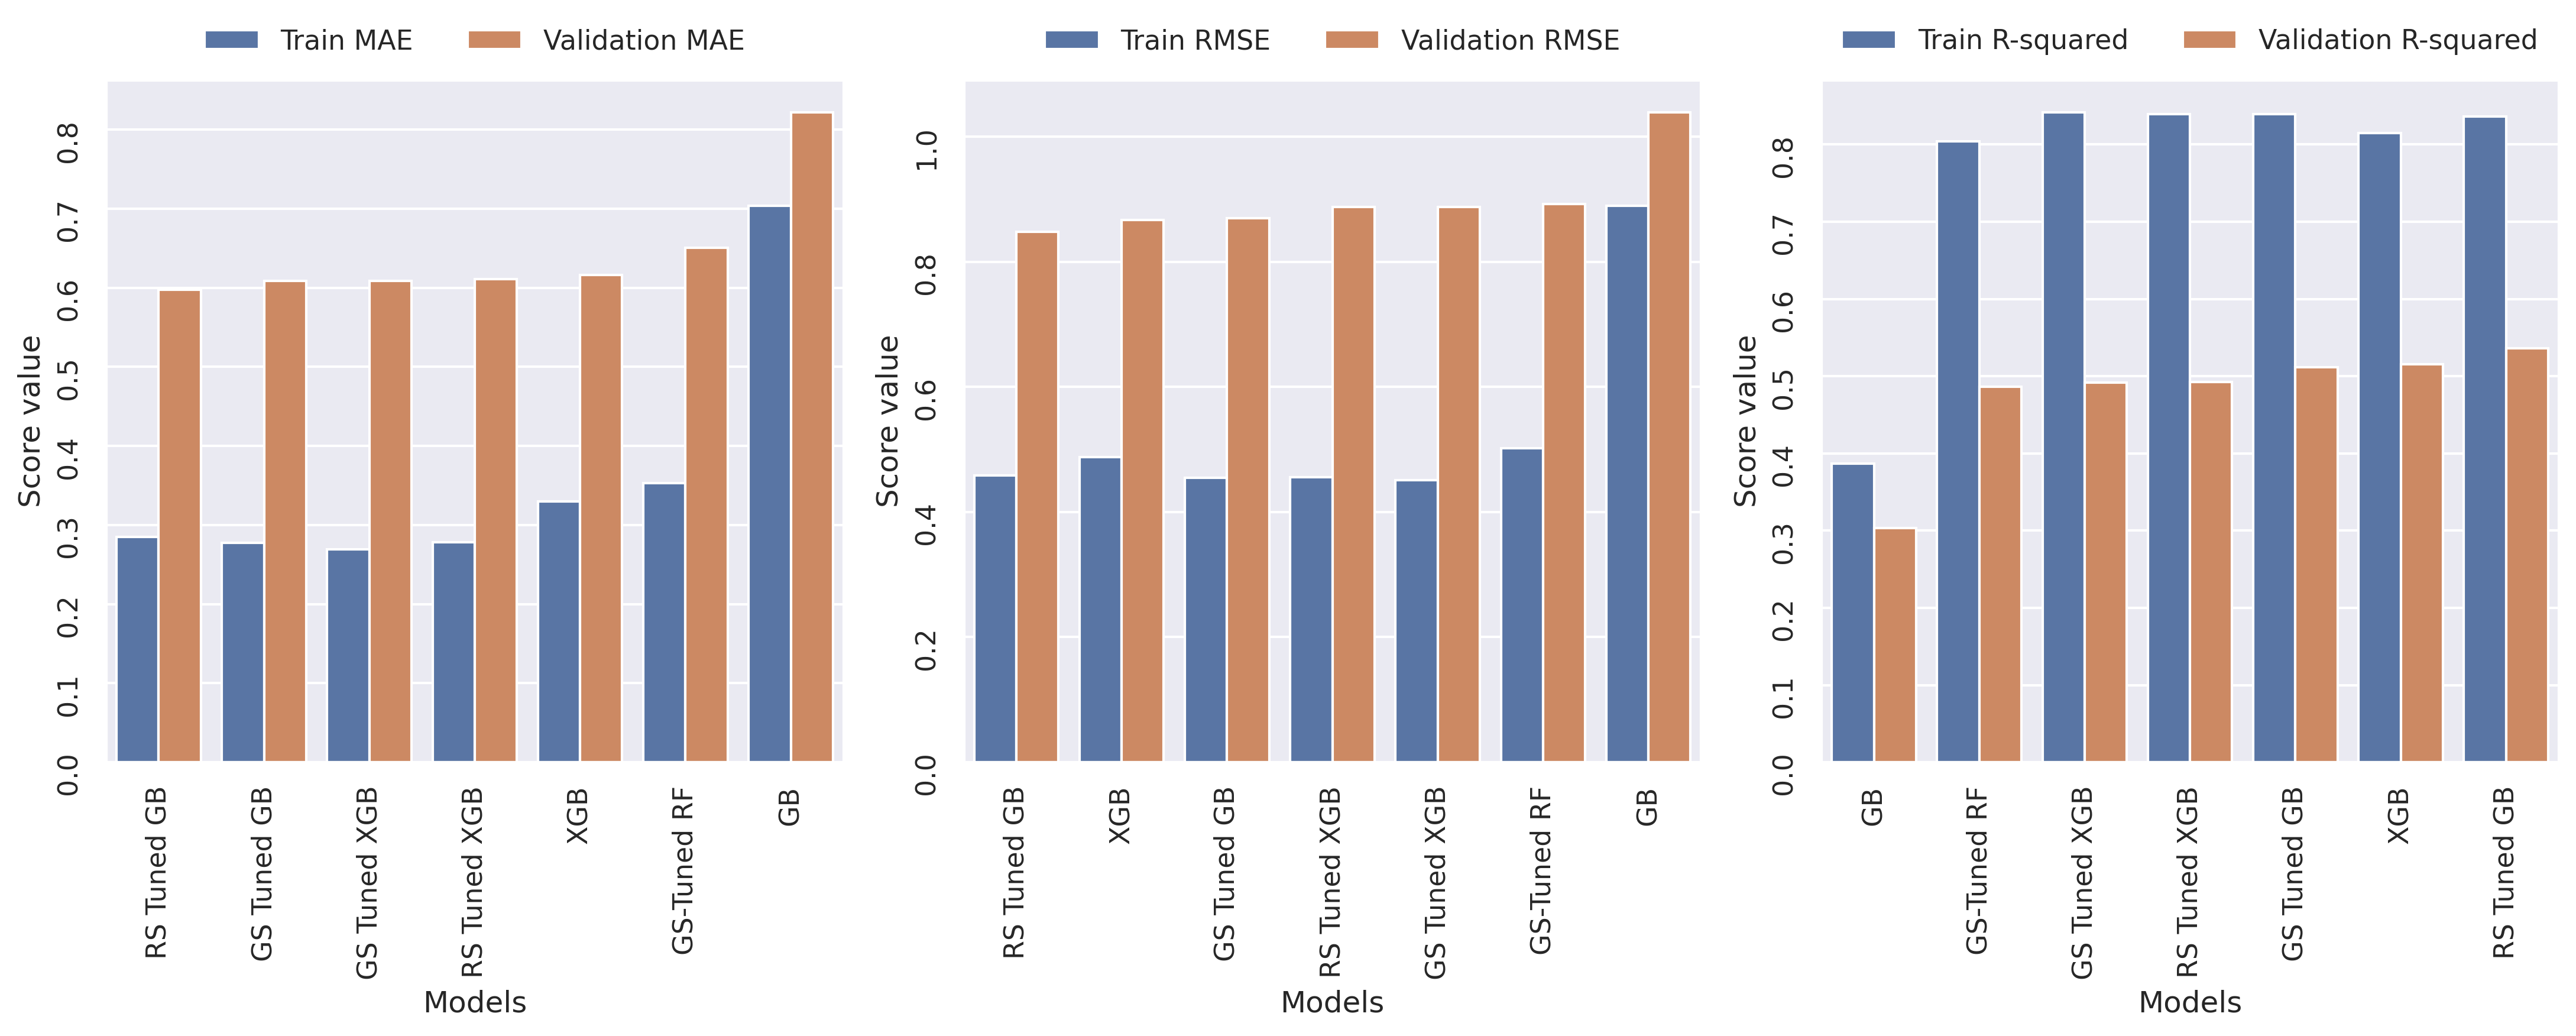

In [104]:
plot_train_val_scores(df_XGB_RF_models)

In [105]:
# list of my tuned/ non-tuned models by using the best parameters

np.random.seed(101)
xgb_rf_models = { "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
             "GB": GradientBoostingRegressor(),
             "RS Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
             "GS Tuned GB": GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1),
             "XGB": XGBRegressor(),
             "RS Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16),
             "GS Tuned XGB": XGBRegressor(min_child_weight=2, max_depth=11, learning_rate=0.14200000000000002)}

models_cv_Scores = []

# a loop for all models and getting their cross-validated scores.

for name, model in xgb_rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])

    models_cv_Scores.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

tuned_models_df = pd.concat(models_cv_Scores)
tuned_models_df.index.name='Models'
tuned_models_df

MAE      RMSE       R^2
Models                                    
GS-Tuned RF   0.641999  0.869644  0.423719
GB            0.768315  0.972022  0.281508
RS Tuned GB   0.629418  0.875562  0.415945
GS Tuned GB   0.624546  0.868963  0.430320
XGB           0.645086  0.883164  0.406843
RS Tuned XGB  0.634840  0.891798  0.394614
GS Tuned XGB  0.629606  0.886842  0.401205

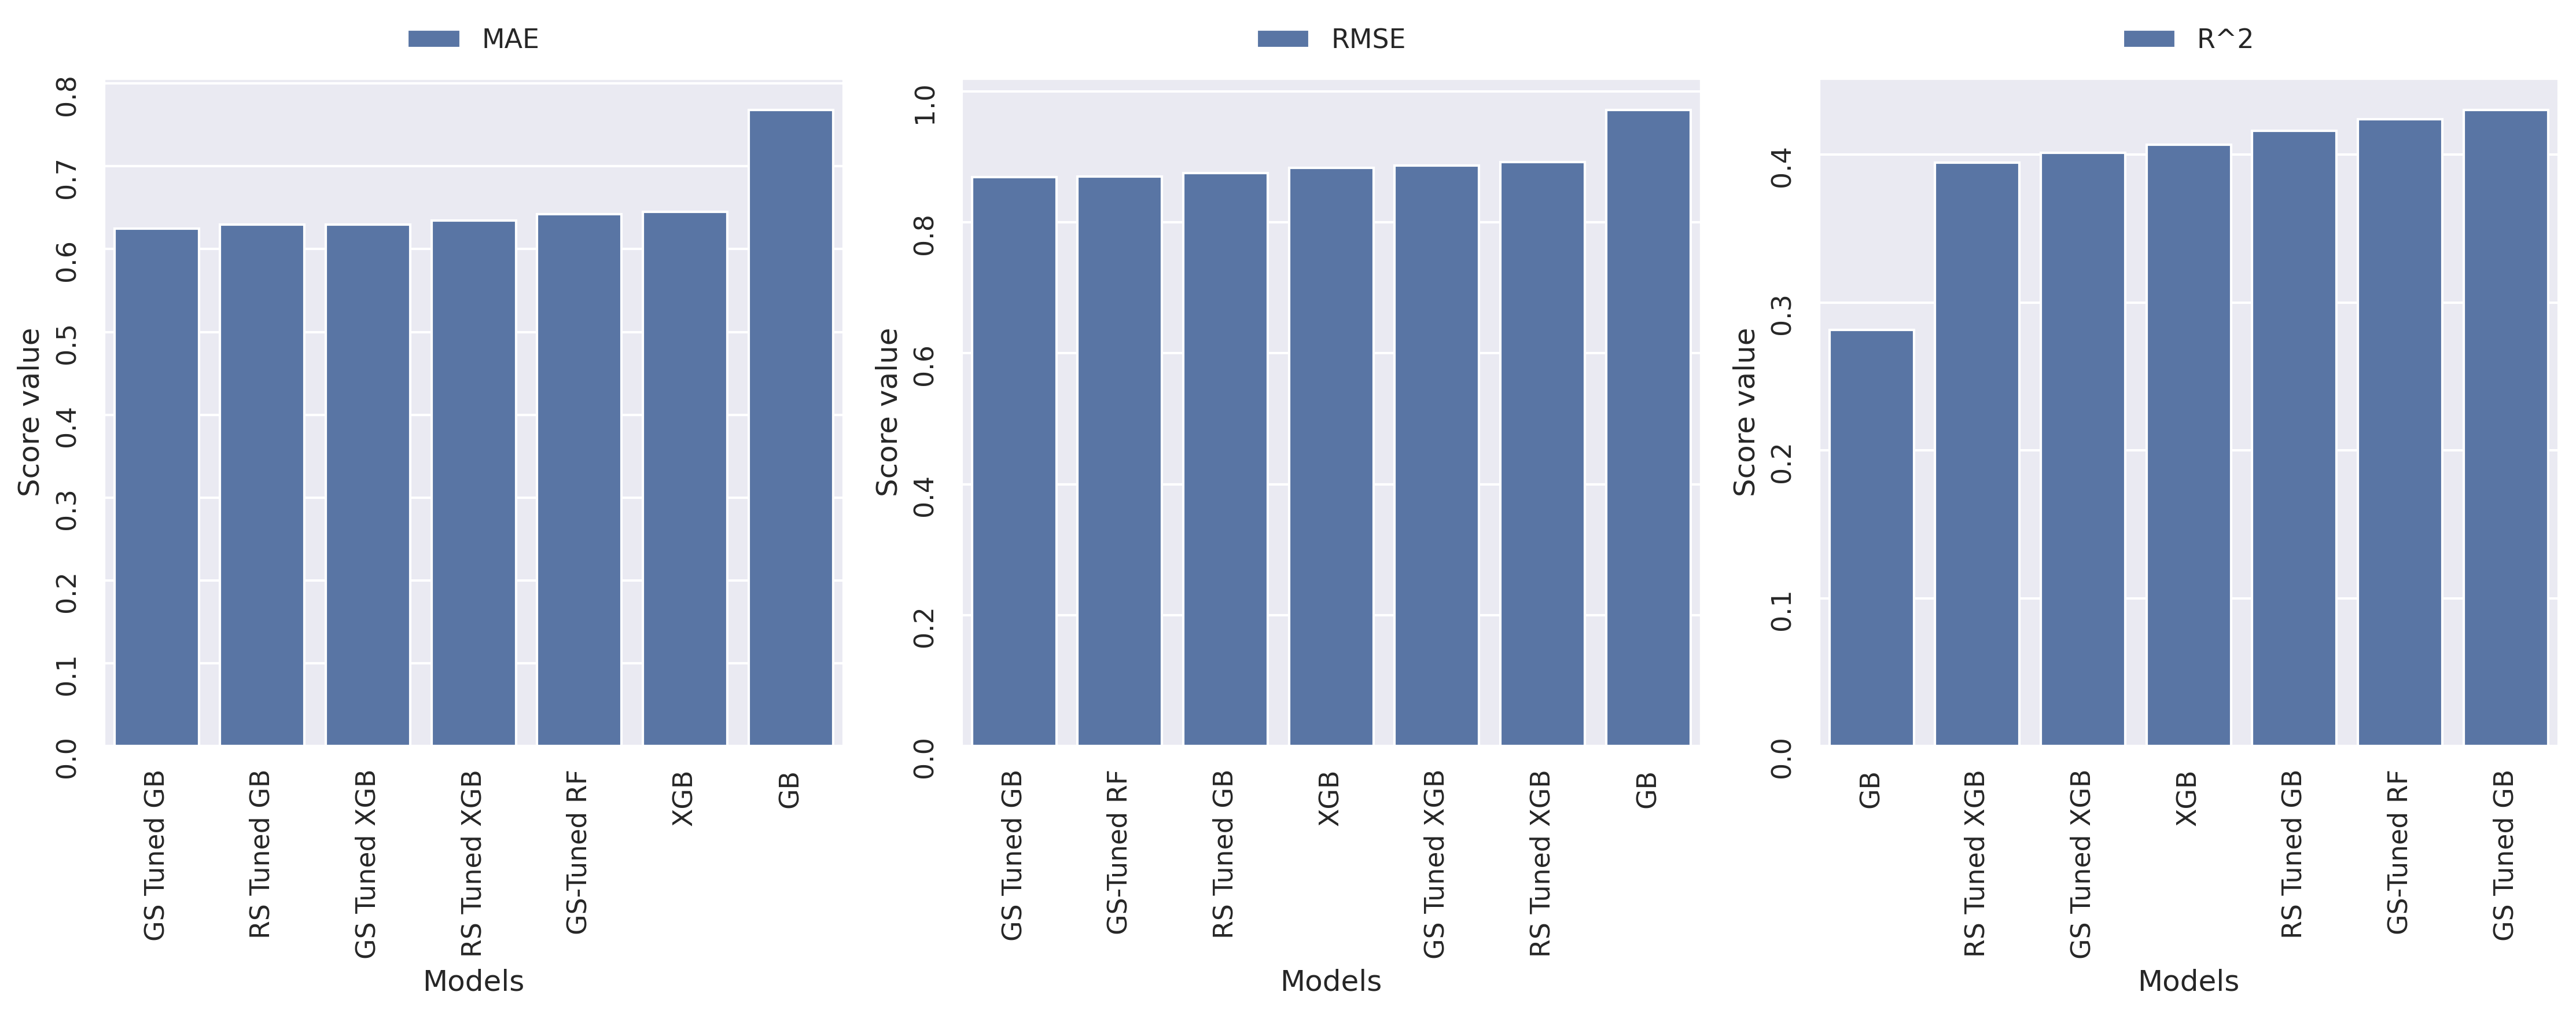

In [106]:
# visualising our cross-validated scores

plot_cross_val_scores(tuned_models_df)

In [107]:
# without early stopping
# following the module

gb_NO_early_stopping = GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1)

pipe_nes = Pipeline(steps=[("preprocessor",preprocessor), ("model",gb_NO_early_stopping)])

pipe_nes.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Assay Type',
                                                   'Target Name']),
                                                 ('num', StandardScaler(),
                                                  ['MW', 'LogP', 'H_Donors',
                                                   'H_Acceptors', 'TPSA',
                                                   'Ring_Count',
                                                   'Rotatable_Bonds'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=11, max_features='log2',
                                           min_samples_split=8))])

In [108]:
# early stopping
# following the module

gb_early_stopping = GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1,
    validation_fraction=0.1,
    n_iter_no_change=5,
    )

pipe_es = Pipeline(steps=[("preprocessor",preprocessor), ("model",gb_early_stopping)])

pipe_es.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Assay Type',
                                                   'Target Name']),
                                                 ('num', StandardScaler(),
                                                  ['MW', 'LogP', 'H_Donors',
                                                   'H_Acceptors', 'TPSA',
                                                   'Ring_Count',
                                                   'Rotatable_Bonds'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=11, max_features='log2',
                                           min_samples_split=8,
                                           n_iter_no_change=5))])

In [109]:
print("n-estimators without early stopping:", gb_NO_early_stopping.n_estimators_)
print("n-estimators with early stopping:", gb_early_stopping.n_estimators_)

n-estimators without early stopping: 100
n-estimators with early stopping: 38


In [110]:
# let us compare the results, whether overfitting issue is addressed or not

np.random.seed(101)
ES_models = { "GB NES": gb_NO_early_stopping,
             "GB ES": gb_early_stopping}

ES_models_Scores = []
ES_models_cv_Scores = []

for name, model in ES_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    ES_models_Scores.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))
    ES_models_cv_Scores.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

df_ES_models = pd.concat(ES_models_Scores)
#df_XGB_RF_models

cv_ES_models_CV = pd.concat(ES_models_cv_Scores)
cv_ES_models_CV.index.name='Models'
#tuned_models_df

In [111]:
df_ES_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                           
GB NES   0.277349    0.454422         0.839768        0.608812   
GB ES    0.379836    0.552036         0.763537        0.679868   

        Validation RMSE  Validation R-squared  
Models                                         
GB NES         0.869975              0.511730  
GB ES          0.943826              0.425315

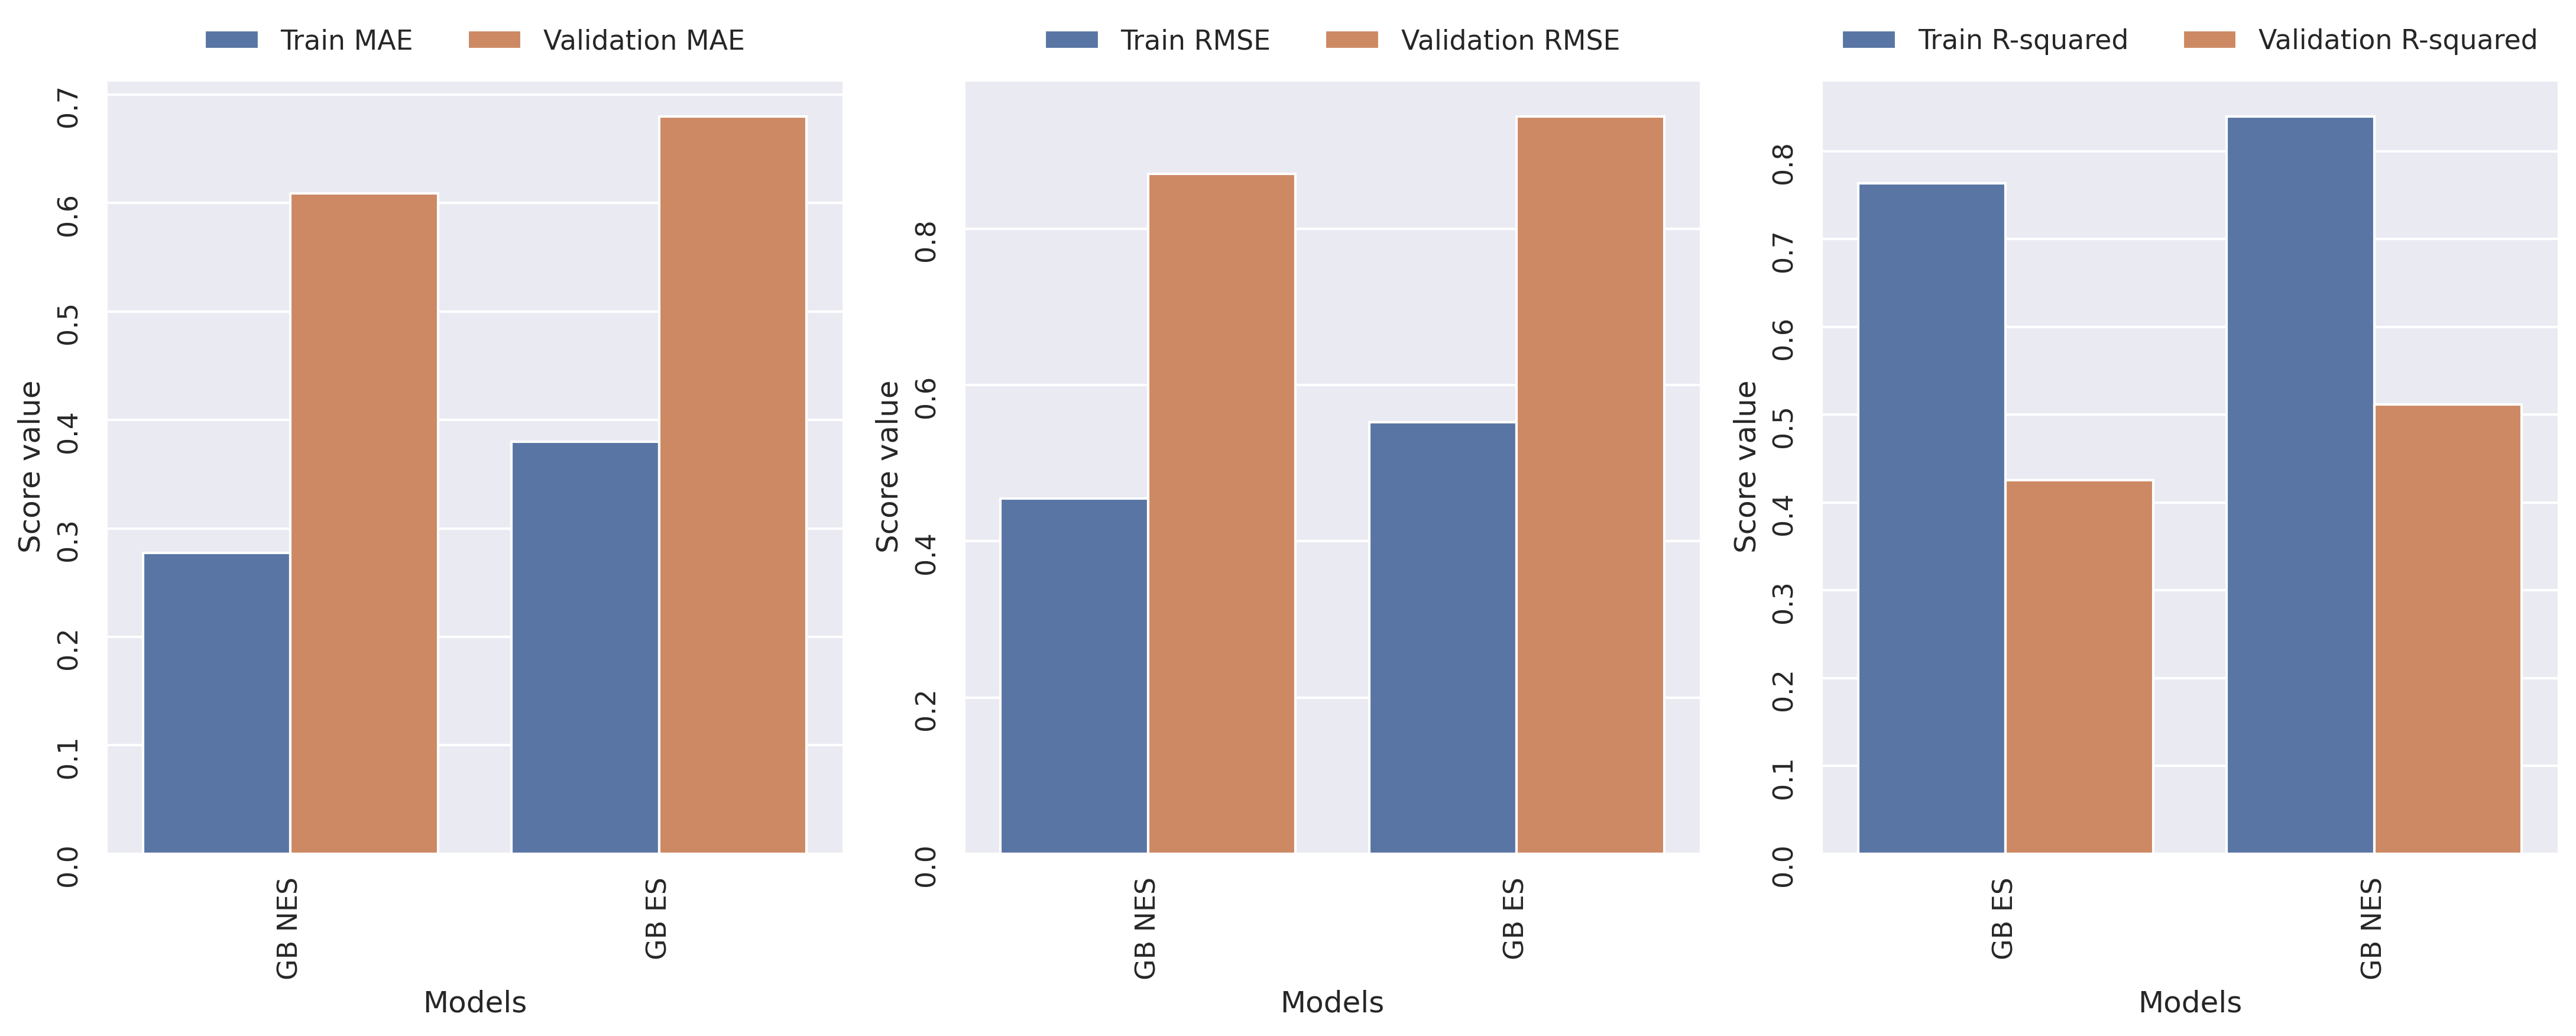

In [112]:
plot_train_val_scores(df_ES_models)

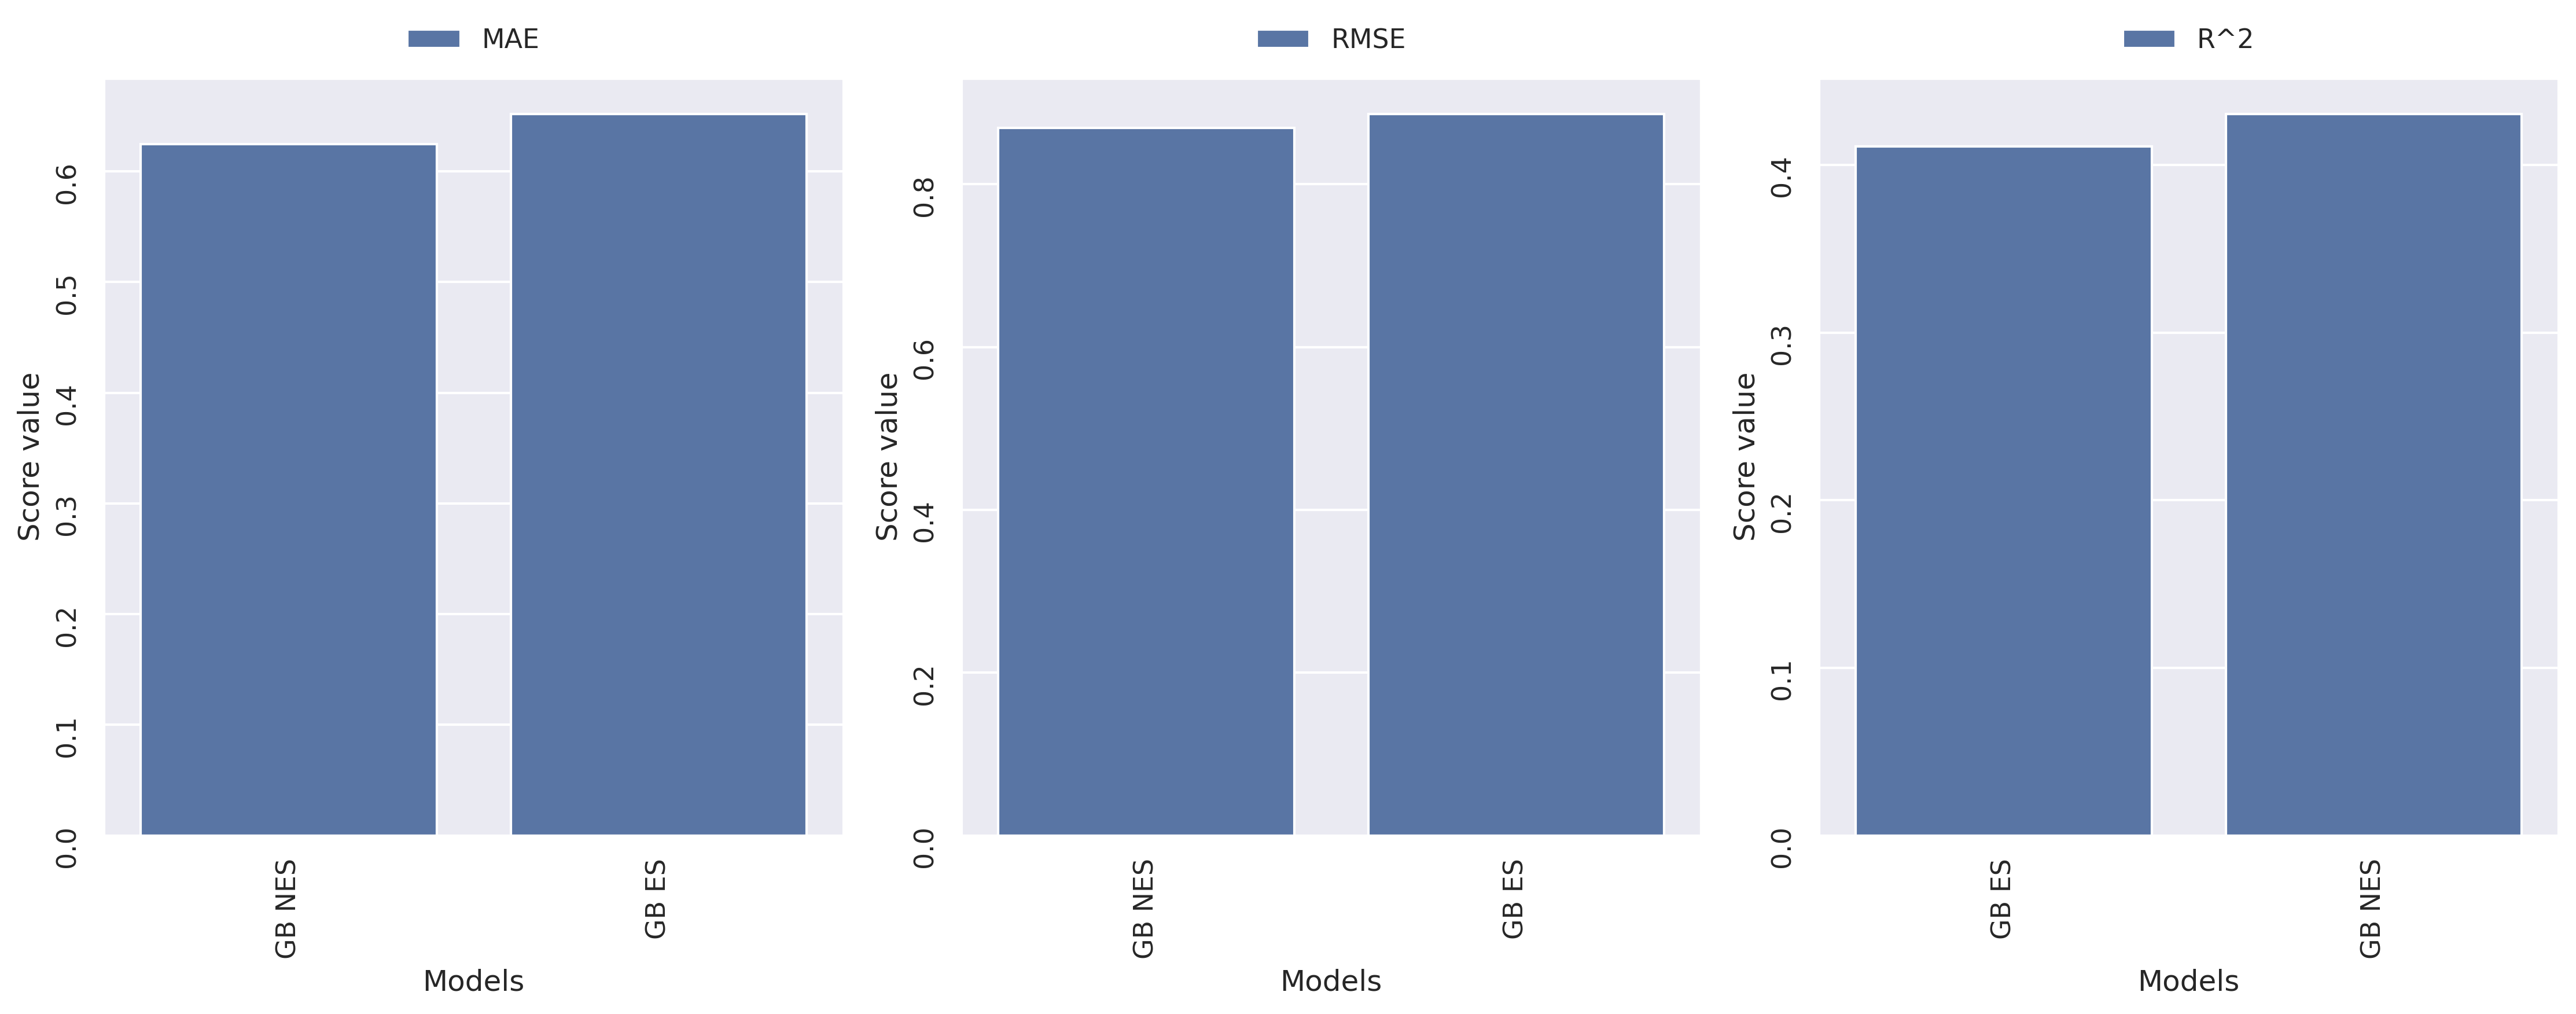

In [113]:
plot_cross_val_scores(cv_ES_models_CV)

In [114]:
# Another alternative way to analyse the influence of early stopping is by following the documentation available online where
# the scores are plotted with respect to boosting iterations
# storing my predictionsv

train_pred_nes = pipe_nes.predict(X_train)
val_pred_nes = pipe_nes.predict(X_val)
train_pred_es = pipe_es.predict(X_train)
val_pred_es = pipe_es.predict(X_val)

In [115]:
# i will be using .staged_predict later on that's why i need to use the transformed train and val sets of X.

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [116]:
_val_transformed = preprocessor.transform(X_val)
# storing the results before I plot them

train_errors_nes = []
val_errors_nes = []

train_errors_es = []
val_errors_es = []

for i, (train_pred, val_pred) in enumerate(
    zip(
        gb_NO_early_stopping.staged_predict(X_train_transformed),
        gb_NO_early_stopping.staged_predict(X_val_transformed),
    )
):
    train_errors_nes.append(mean_squared_error(y_train, train_pred))
    val_errors_nes.append(mean_squared_error(y_val, val_pred))

for i, (train_pred, val_pred) in enumerate(
    zip(
        gb_early_stopping.staged_predict(X_train_transformed),
        gb_early_stopping.staged_predict(X_val_transformed),
    )
):
    train_errors_es.append(mean_squared_error(y_train, train_pred))
    val_errors_es.append(mean_squared_error(y_val, val_pred))

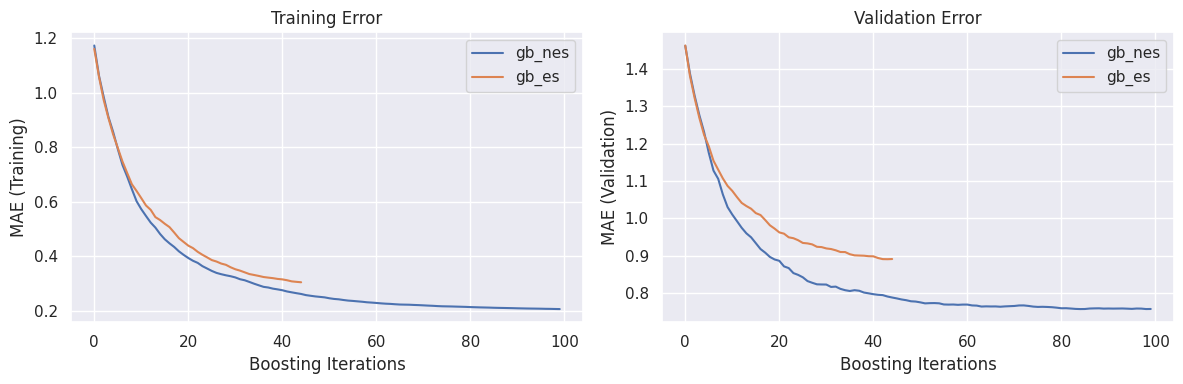

In [117]:
# plotting the results

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].plot(train_errors_nes, label="gb_nes")
axes[0].plot(train_errors_es, label="gb_es")
axes[0].set_xlabel("Boosting Iterations")
axes[0].set_ylabel("MAE (Training)")
#axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_title("Training Error")

axes[1].plot(val_errors_nes, label="gb_nes")
axes[1].plot(val_errors_es, label="gb_es")
axes[1].set_xlabel("Boosting Iterations")
axes[1].set_ylabel("MAE (Validation)")
#axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_title("Validation Error")

#training_times = [training_time_full, training_time_early_stopping]
#labels = ["gb_nes", "gb_es"]
#bars = axes[2].bar(labels, training_times)
#axes[2].set_ylabel("Training Time (s)")

#for bar, n_estimators in zip(bars, [n_estimators_full, estimators_early_stopping]):
#    height = bar.get_height()
#    axes[2].text(
#        bar.get_x() + bar.get_width() / 2,
#        height + 0.001,
#        f"Estimators: {n_estimators}",
#        ha="center",
#        va="bottom",
#    )

plt.tight_layout()
plt.show()

In [118]:
# getting feature importances

coef_df = pd.DataFrame({'Feature Importances':gb_NO_early_stopping.feature_importances_},index=preprocessor.get_feature_names_out())
coef_df = coef_df.sort_values('Feature Importances',ascending=False)
coef_df

Feature Importances
num__LogP                        0.174642
num__MW                          0.169108
num__TPSA                        0.154064
num__Rotatable_Bonds             0.104650
num__H_Acceptors                 0.076678
num__H_Donors                    0.075600
num__Ring_Count                  0.075525
cat__Target Name_D3              0.032378
cat__Assay Type_A                0.032283
cat__Target Name_D2              0.029750
cat__Assay Type_F                0.025905
cat__Assay Type_B                0.022395
cat__Target Name_D1              0.013758
cat__Target Name_D4              0.010855
cat__Target Name_D5              0.002410

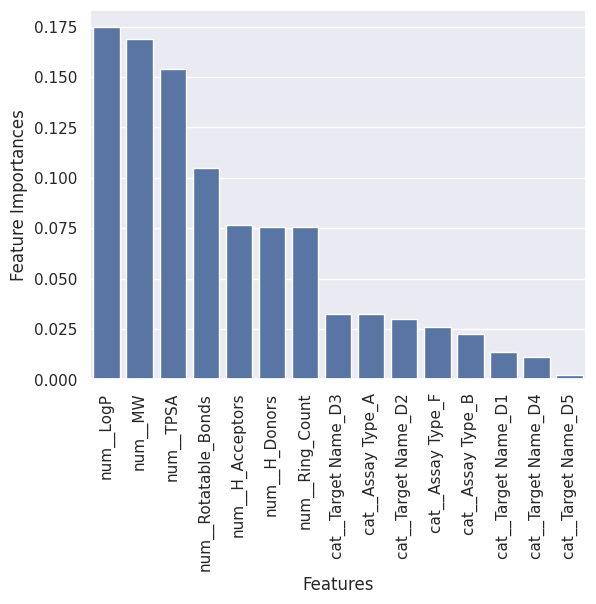

In [119]:
sns.barplot(data=coef_df,x=coef_df.index,y='Feature Importances');
plt.xticks(rotation=90);
plt.xlabel('Features');
plt.show()

In [120]:
# a comparison of all models that I have tried and worked on in this project.

all_models = {"Ridge": Ridge(),
            "SVR_linear": SVR(kernel="linear"),
            "SVR_rbf": SVR(kernel="rbf"),
            "RF": RandomForestRegressor(),
            "Tuned SVR_rbf": SVR(kernel='rbf', gamma='scale', C=21.54434690031882),
            "RS-Tuned RF": RandomForestRegressor(n_estimators=500, min_samples_split=6),
            "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
            'ab':AdaBoostRegressor(),
            'gb': GradientBoostingRegressor(),
            "RS Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
             "GS Tuned GB": GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1),
             "XGB": XGBRegressor(),
             "RS Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16),
             "GS Tuned XGB": XGBRegressor(min_child_weight=2, max_depth=11, learning_rate=0.14200000000000002)}

ALL_model_scores = []
ALL_models_cv_Scores = []

for name, model in all_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    ALL_model_scores.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))
    ALL_models_cv_Scores.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

df_ALL_models = pd.concat(ALL_model_scores)
#df_XGB_RF_models

df_ALL_models_CV = pd.concat(ALL_models_cv_Scores)
df_ALL_models_CV.index.name='Models'
#tuned_models_df

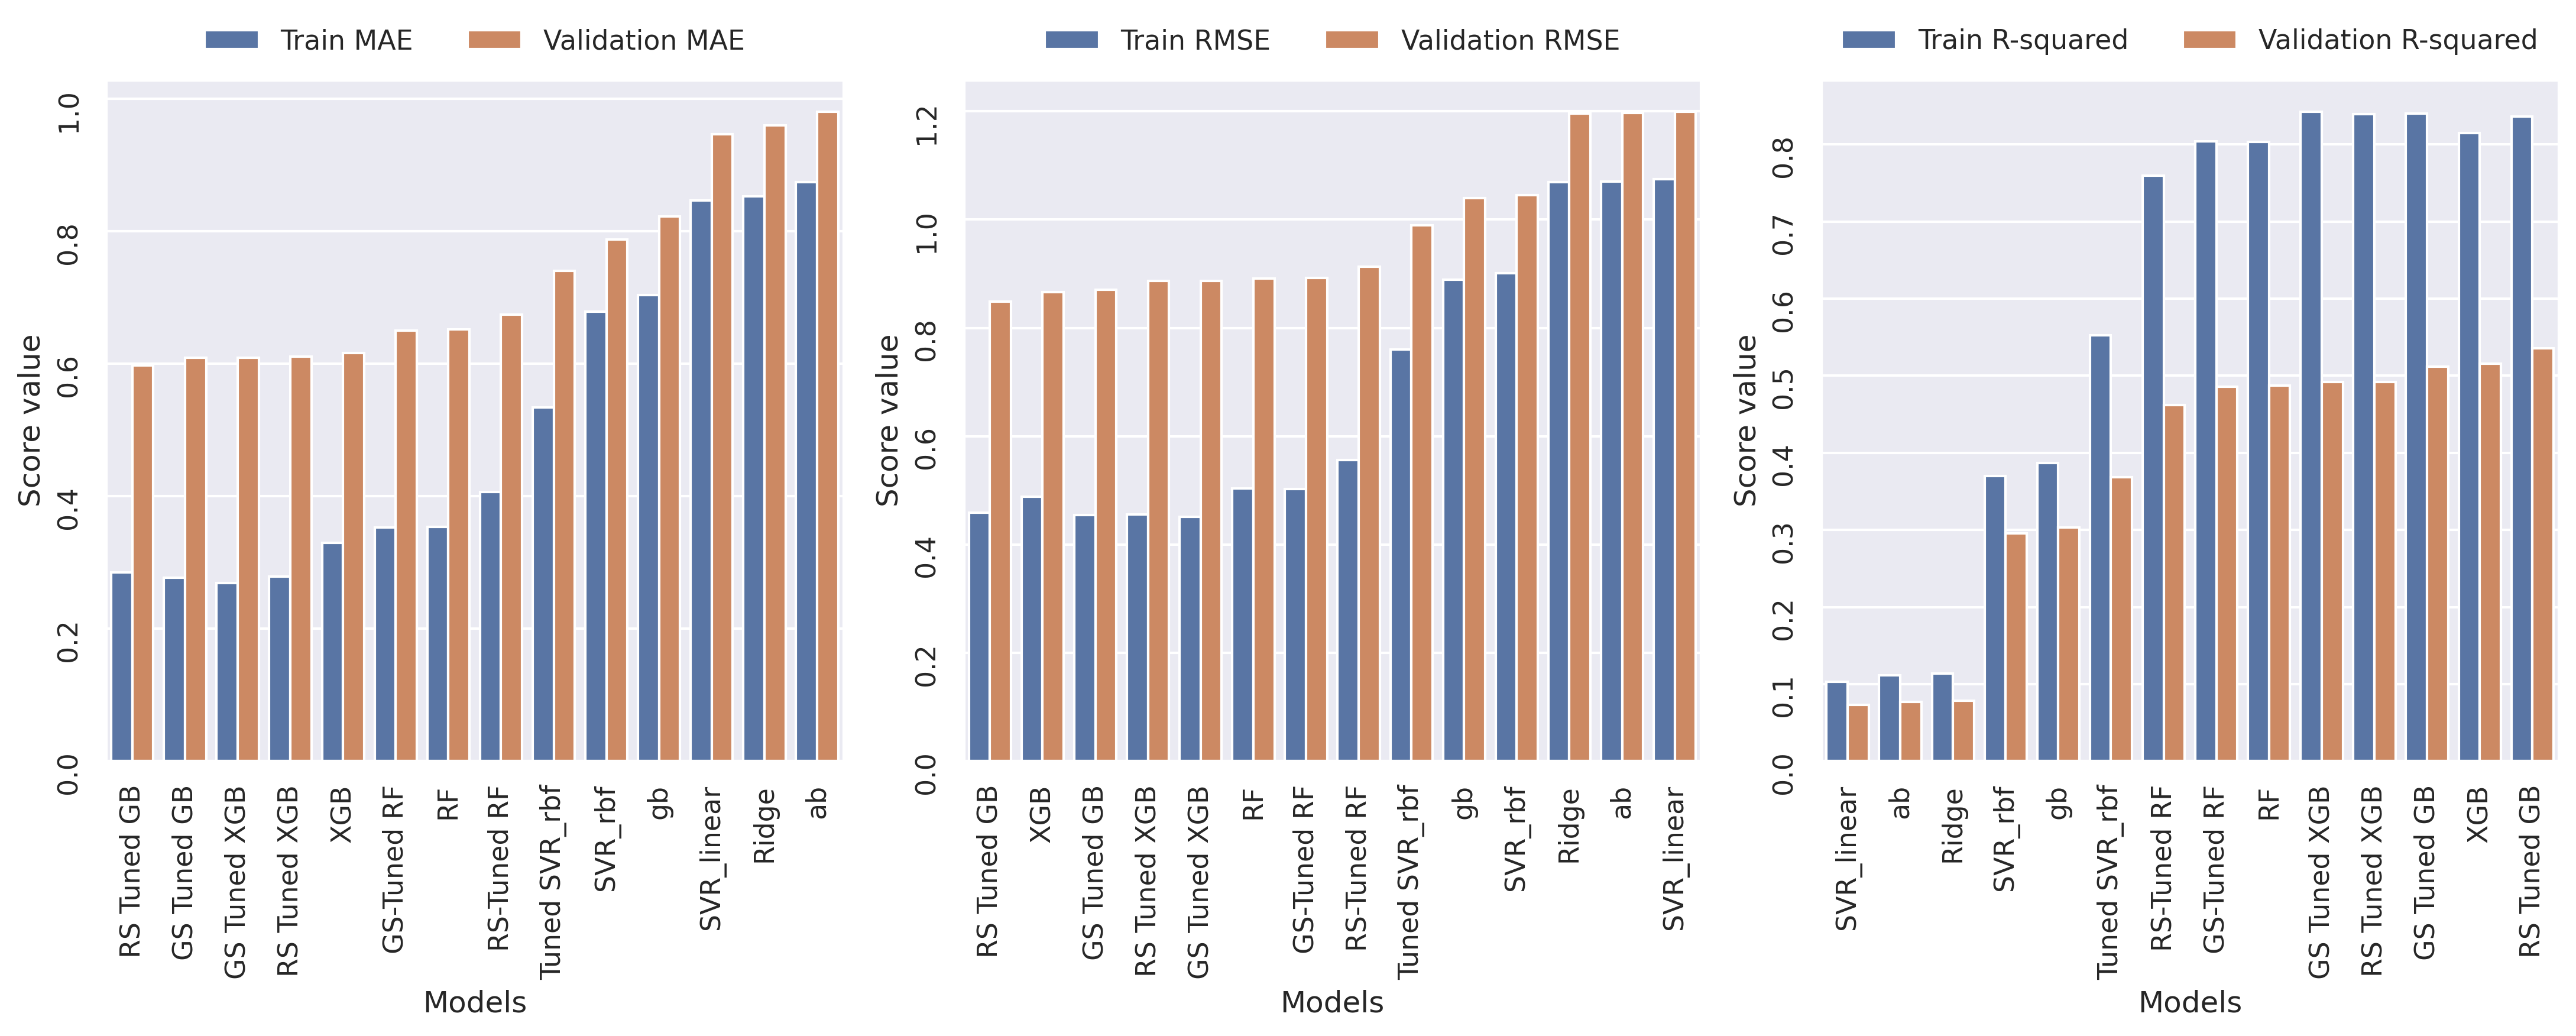

In [121]:
plot_train_val_scores(df_ALL_models)

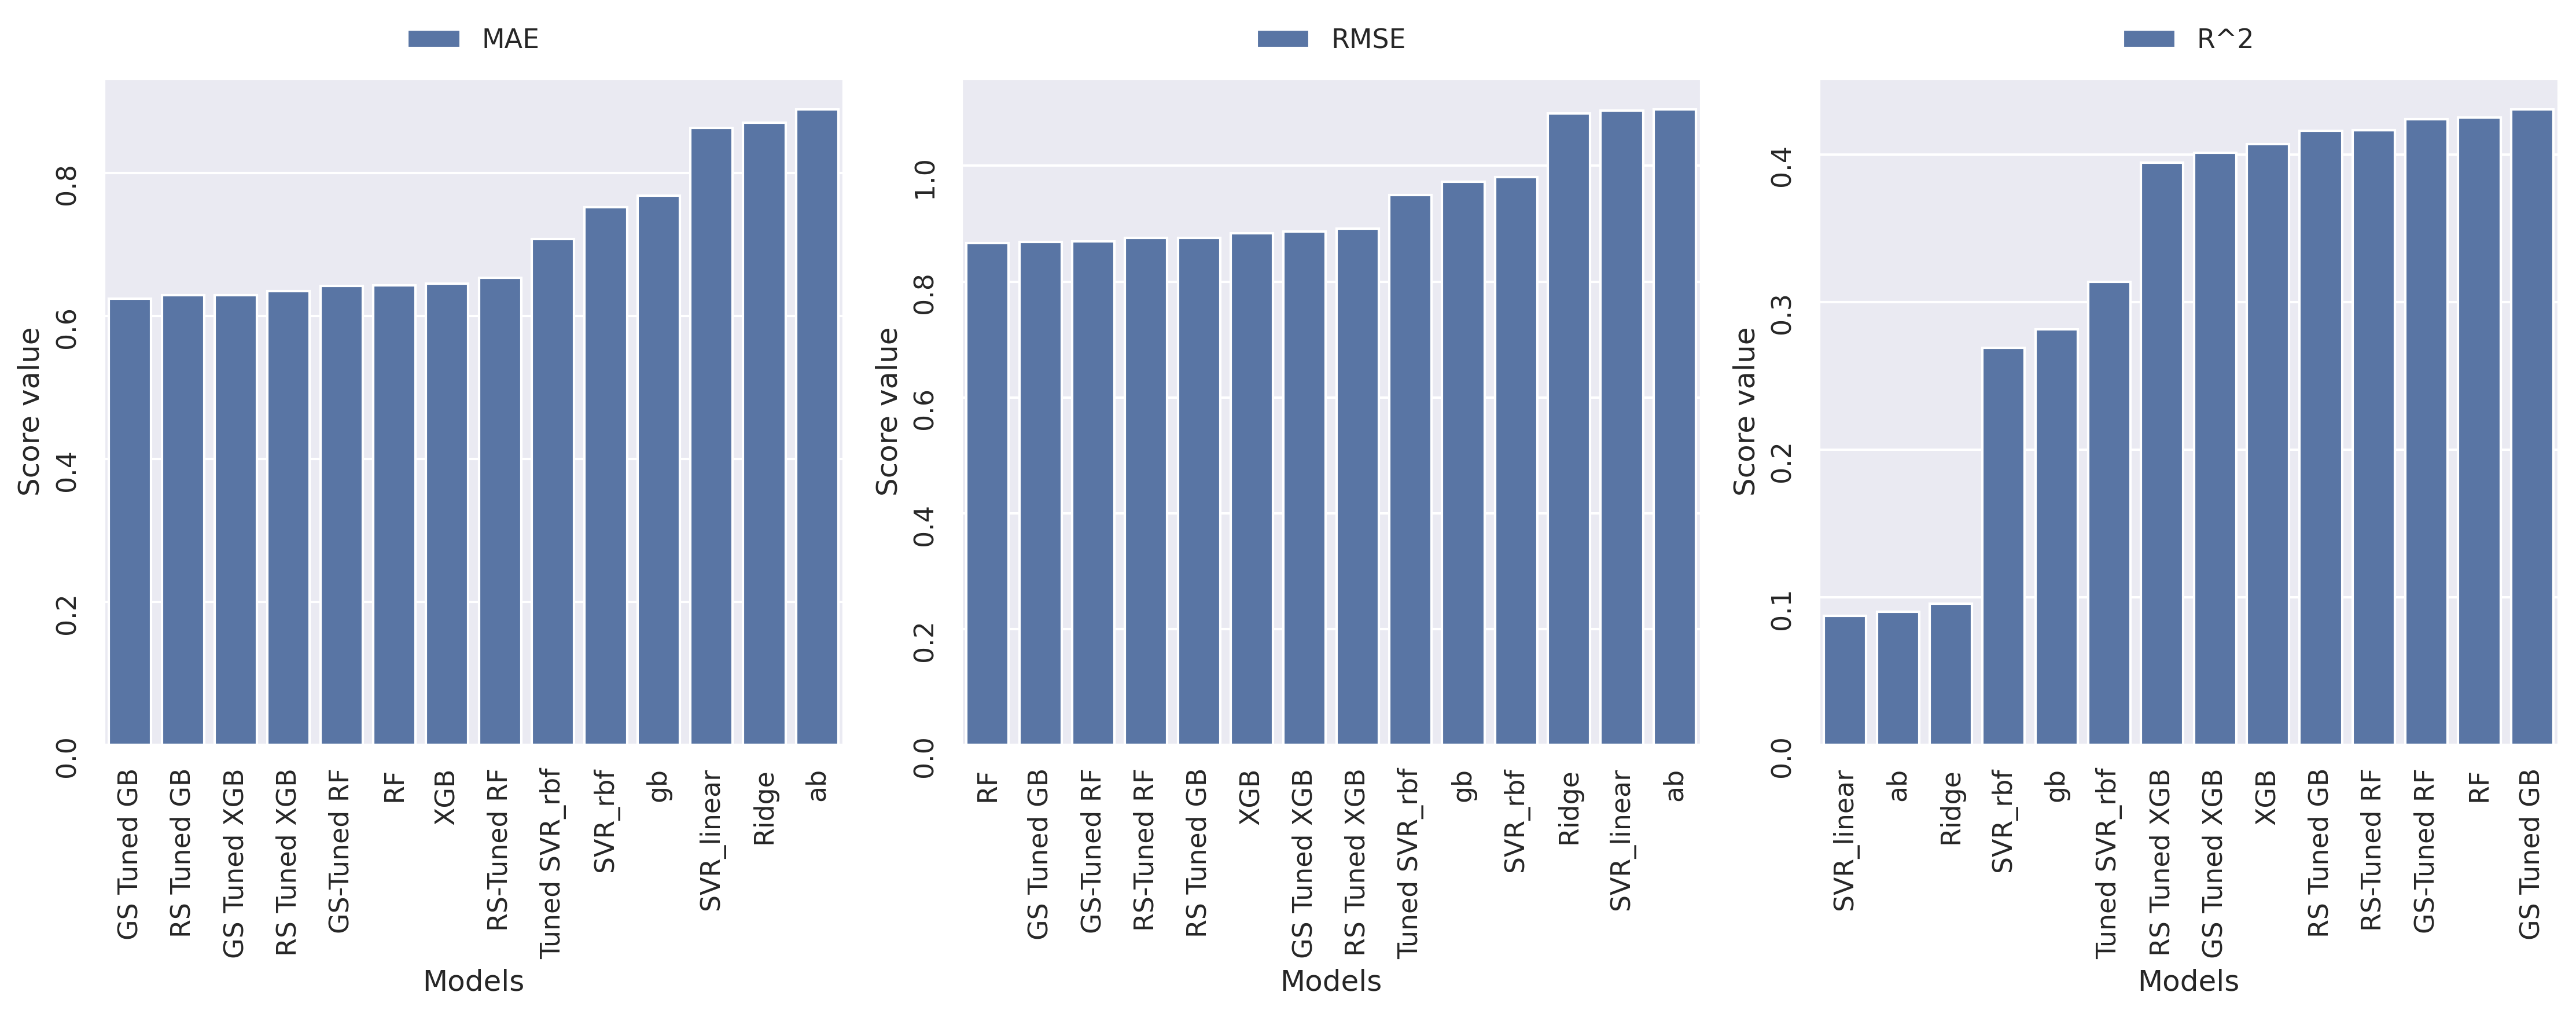

In [122]:
plot_cross_val_scores(df_ALL_models_CV)